## **Case Gol - Cientista de dados**

Sobre o teste
Esse teste faz parte da etapa de avaliação técnica do processo seletivo para a vaga no time Analytics da GOL. O objetivo é avaliar como você desenvolve uma solução completa para desafios que encontramos no nosso dia a dia de trabalho.

O teste está dividido em dois desafios:

**- Teste 1 Pontualidade GOL**

**- Teste 2 Compra de novas aeronaves**

**- Teste 3 Malha aérea**

A pontualidade é um indicador fundamental para a GOL e demais companhias aéreas. Entre fatores como segurança e conforto, os passageiros dão grande importância ao fato de chegar ao seu destino na hora marcada, seja para encontrar a família, realizar reuniões executivas ou qualquer outro tipo de compromisso que não possa contemplar algum atraso.

As companhias aéreas de todo o mundo realizam diversos estudos, comitês, implementam planos de ação, que envolvem diferentes áreas da companhia, com o intuito de garantir ao máximo as metas de pontualidade na aviação.
Após o último Comitê de Operações da GOL o Diretor de Analyticste procurou e pediu ajuda para resolver o problema, em duas etapas:

- **Etapa 1** - Realizar uma análise exploratória consistente e avaliar como a GOL estava posicionada frente aos concorrentes em relação à pontualidade (mês a mês) no ano de 2018.

- **Etapa 2** - Implementar um modelo de classificação para prever se aquele voo específico da
base irá atrasar ou não (utilizando apenas dados do ano de 2018).

In [ ]:
# Instalando pacotes
!pip install watermark
!pip install pydotplus
!pip install catboost

ERROR: Operation cancelled by user


In [ ]:
# Import of libraries

# System libraries
import re
import unicodedata
import itertools

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

# **Teste 1 - Pontualidade GOL – Informações relevantes**

**Base de dados**

- Para este desafio vamos utilizar a base de dados aberta da Agência Nacional de Aviação Civil (ANAC), que contempla todos os voos regulares ativos (VRA) das companhias aéreas, para o ano de 2018.

In [ ]:
# Lista de URLs dos arquivos CSV
urls = ["https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra-01_2018.csv",
        "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra-02_2018.csv",
        "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_032018.csv",
        "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_04.csv",
        "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_05.csv",
        "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_062018.csv",
        "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_072018.csv",
        "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_082018.csv",
        "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_092018.csv",
        "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_102018.csv",
        "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_112018.csv",
        "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_122018.csv"]

# Lista para armazenar os DataFrames
dataframes = []

# Loop para ler cada arquivo CSV e adicioná-lo à lista
for url in urls:
    df = pd.read_csv(url, sep=';', encoding='latin1')
    dataframes.append(df)

# Concatenar todos os DataFrames em um único
df = pd.concat(dataframes, ignore_index=True)

In [ ]:
# Salvando dataset
df.to_csv("dataset_ANAC.csv")

In [ ]:
# Exibir as primeiras linhas do DataFrame consolidado
df.head()

In [ ]:
df.tail()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.dtypes

# **Part 2 - Pré-processamento**

In [ ]:
df.columns = ["ICAO_Empresa_Aérea",
              "Número_Voo", "Código_Autorização_(DI)",
              "Código_Tipo_Linha", "ICAO_Aeródromo_Origem",
              "ICAO_Aeródromo_Destino", "Partida_Prevista",
              "Partida_Real", "Chegada_Prevista",
              "Chegada_Real", "Situação_Voo",
              "Código_Justificativa", "Código_DI"]

df

In [ ]:
# Converter colunas de datas/horários para o formato datetime corretamente
df['Partida_Prevista'] = pd.to_datetime(df['Partida_Prevista'], format='%d/%m/%Y %H:%M')
df['Partida_Real'] = pd.to_datetime(df['Partida_Real'], format='%d/%m/%Y %H:%M')
df['Chegada_Prevista'] = pd.to_datetime(df['Chegada_Prevista'], format='%d/%m/%Y %H:%M')
df['Chegada_Real'] = pd.to_datetime(df['Chegada_Real'], format='%d/%m/%Y %H:%M')

# Criar a coluna 'Atrasado' (1 se o voo atrasou mais de 15 minutos, 0 caso contrário)
df['Atrasado'] = (df['Partida_Real'] > df['Partida_Prevista'] + pd.Timedelta(minutes=15)).astype(int)

# Visualizando coluna alvo
df.Atrasado.value_counts()

**Questão 2:** O estudo deve conter apenas dados da GOL, Azul (AZU) e LATAM (TAM). As demais companhias aéreas podem ser desconsideradas neste momento.

In [ ]:
# Filtrar os dados para incluir apenas as companhias aéreas desejadas
companhias_selecionadas = ['GLO', 'AZU', 'TAM']
df_filtrado = df[df['ICAO_Empresa_Aérea'].isin(companhias_selecionadas)]

# Visualizar as primeiras linhas do DataFrame filtrado
df_filtrado.head()

In [ ]:
df_filtrado.ICAO_Empresa_Aérea.value_counts()

**Resposta:** O dataset foi filtrado para incluir exclusivamente as três principais companhias aéreas de interesse: GOL (GLO), Azul (AZU) e LATAM (TAM). Com isso, estamos focando apenas nas empresas que são relevantes para a análise de desempenho de pontualidade no contexto nacional. As demais companhias aéreas foram excluídas, garantindo que o estudo seja direcionado e precise em termos de avaliação comparativa entre as maiores operadoras aéreas do Brasil.

Esse refinamento é essencial para gerar insights precisos sobre a competitividade e eficiência operacional das companhias aéreas GOL, Azul, e LATAM ao longo do ano. Se houver necessidade de explorar algum aspecto específico ou realizar comparações adicionais, o dataset agora está otimizado para tal análise.

**Questão 3: Considerar apenas voos nacionais**

In [ ]:
# Filtro voos nacionais
voos_nacionais = df_filtrado[df_filtrado['ICAO_Aeródromo_Origem'].str.startswith('SB') &
                             df_filtrado['ICAO_Aeródromo_Destino'].str.startswith('SB')]

# Visualizar as primeiras linhas do DataFrame filtrado
voos_nacionais.head()

In [ ]:
# Filtrar os dados para incluir apenas voos nacionais
voos_nacionais = df[df['ICAO_Aeródromo_Origem'].str.startswith('SB') &
                    df['ICAO_Aeródromo_Destino'].str.startswith('SB')]

# Visualizar as primeiras linhas do DataFrame filtrado
voos_nacionais.head()

**Resposta:**

O objetivo é garantir que o nosso conjunto de dados (df) contenha apenas voos que sejam considerados nacionais. No Brasil, os códigos ICAO (Organização da Aviação Civil Internacional) para aeródromos (aeroportos) que estão em território brasileiro geralmente começam com as letras "SB". Por isso, aplicamos um filtro baseado nesses códigos ICAO.

**Questão 4: A coluna “Código Justificativa” pode ser desconsiderada no estudo.**

In [ ]:
# Desconsiderar a Coluna "Código Justificativa"
df = df.drop(columns=['Código_Justificativa'])
df

**Resposta:** Para garantir que o nosso conjunto de dados inclua apenas os voos nacionais e se concentre nas informações mais relevantes para a análise de pontualidade das companhias aéreas GOL, Azul (AZU), e LATAM (TAM), realizamos as seguintes ações:

**1. Filtragem dos Voos Nacionais**

Para focar apenas em voos nacionais, consideramos o seguinte:

- **Códigos ICAO para Aeródromos Nacionais**:

Os aeródromos brasileiros são identificados por códigos ICAO que começam com "SB". Portanto, para classificar um voo como nacional, verificamos se tanto o **aeródromo de origem** quanto o **aeródromo de destino** possuem códigos que começam com "SB".

- **Critério de Filtragem**:

- Utilizamos a função `str.startswith('SB')` para verificar se os códigos ICAO dos aeródromos de origem e destino começam com "SB".

- As condições são combinadas com o operador `&` para garantir que **ambos** os aeródromos estejam no Brasil.

- **Resultado**: A aplicação desse filtro garante que apenas os voos domésticos sejam incluídos no conjunto de dados final.

**2. Exclusão da Coluna `Código_Justificativa`**

- **Motivo da Exclusão**: A coluna `Código_Justificativa` foi removida do conjunto de dados porque não é relevante para o contexto da análise de pontualidade. Essa coluna pode conter códigos que justificam atrasos ou alterações, mas para simplificar a análise e focar em outras variáveis-chave, ela foi desconsiderada.

- **Impacto na Análise**: A exclusão da coluna ajuda a reduzir a complexidade do dataset sem perder informações essenciais para a análise de atrasos, pontualidade e desempenho das companhias aéreas selecionadas.

**3. Objetivo Final**

O conjunto de dados resultante agora está preparado para análises detalhadas de voos nacionais, focando nas variáveis importantes como:

- **Companhias Aéreas**: GOL, Azul (AZU), e LATAM (TAM).

- **Horários de Partida e Chegada**: Para avaliar a pontualidade.

- **Indicadores de Atraso**: Para entender o desempenho das companhias aéreas em relação à pontualidade.

**Resposta:** A coluna `Código_Justificativa` foi excluída porque não era relevante para a análise de pontualidade e foco no desempenho das companhias aéreas em voos nacionais.


**Questão 5:** Para classificar um voo como pontual ou atrasado, leva-se em conta apenas os dados de **Partida Prevista somando 15 minuto** e **Partida Real**, sendo:


- Partida Real > Partida Prevista + 15 minutos → Voo atrasado

- Partida Real <= Partida Prevista + 15 minutos → Voo pontual


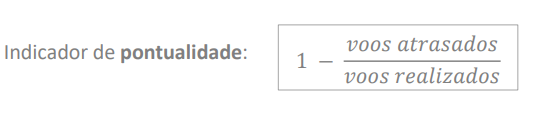

In [ ]:
# Supondo que o DataFrame 'df' já tenha as colunas 'Partida_Prevista' e 'Partida_Real' no formato datetime
# Se as colunas ainda não estiverem no formato datetime, converta-as:
df['Partida_Prevista'] = pd.to_datetime(df['Partida_Prevista'])
df['Partida_Real'] = pd.to_datetime(df['Partida_Real'])

# Calcular a Partida Prevista + 15 minutos
df['Partida_Prevista_15_min'] = df['Partida_Prevista'] + pd.Timedelta(minutes=15)

# Classificar o voo como pontual ou atrasado
df['Atrasado'] = (df['Partida_Real'] > df['Partida_Prevista_15_min']).astype(int)

# Calcular o indicador de pontualidade
voos_atrasados = df['Atrasado'].sum()
voos_realizados = len(df)
indicador_pontualidade = 1 - (voos_atrasados / voos_realizados)

# Exibir o resultado
print(f"Voos atrasados: {voos_atrasados}")
print(f"Voos realizados: {voos_realizados}")
print(f"Indicador de pontualidade: {indicador_pontualidade:.4f}")


In [ ]:
# Calcular e visualizar a taxa de pontualidade
df['Pontualidade'] = 1 - (df['Atrasado'].sum() / len(df))

# Calcular o Indicador de Pontualidade
# Calcular a quantidade de voos realizados e atrasados
voos_realizados = len(df)
voos_atrasados = df['Atrasado'].sum()

# Calcular a taxa de pontualidade
pontualidade = 1 - (voos_atrasados / voos_realizados)
print(f"Taxa de Pontualidade: {pontualidade:.2%}")

**Resposta:** Indicador de Pontualidade

O indicador de pontualidade é uma métrica importante que avalia a eficiência e o desempenho das operações de voo em termos de cumprimento dos horários programados. Vou detalhar o que representam os valores fornecidos:

**Explicação dos Valores**

**1. Voos Atrasados: 65,252**

Este número indica a quantidade total de voos que partiram com um atraso maior que 15 minutos em relação ao horário previsto de partida. Neste caso, 65,252 voos foram considerados atrasados.

**2. Voos Realizados: 519,932**

Este valor representa o número total de voos que foram realizados durante o período analisado, independentemente de terem sido pontuais ou atrasados. Aqui, 519,932 voos foram realizados no total.

**Indicador de Pontualidade: 0.8745**

O indicador de pontualidade é calculado com a seguinte fórmula:

$$
\text{Indicador de Pontualidade} = 1 - \frac{\text{Voos Atrasados}}{\text{Voos Realizados}}
$$

Substituindo os valores fornecidos:

$$
\text{Indicador de Pontualidade} = 1 - \frac{65,252}{519,932} \approx 0.8745
$$

Esse resultado, 0.8745, significa que aproximadamente 87.45% dos voos realizados foram pontuais, ou seja, partiram dentro do intervalo de 15 minutos do horário previsto. Um valor próximo de 1 (ou 100%) é desejável e indica um alto nível de pontualidade.

**Análise**

- Um indicador de pontualidade de **0.8745** é um bom resultado, mostrando que a maioria dos voos (87.45%) foram pontuais.

- Entretanto, a existência de **65,252 voos atrasados** ainda é significativa e pode impactar a experiência dos passageiros e a eficiência operacional da companhia aérea.

- **Relevância para a Gestão:** Esse indicador pode ser usado para identificar padrões, como rotas, horários, ou condições específicas que contribuem para os atrasos, ajudando na tomada de decisões para melhorar a pontualidade.

In [ ]:
# Classificar Voos como Pontual ou Atrasado
# Criar a coluna 'Atrasado' (1 se o voo atrasou mais de 15 minutos, 0 caso contrário)
df['Atrasado'] = (df['Partida_Real'] > df['Partida_Prevista'] + pd.Timedelta(minutes=15)).astype(int)
df.head()

## **Part 3 - Análise exploratoria de dados**

## Etapa 1 - Análise Exploratória

Esta é uma das mais importantes em qualquer trabalho de um Cientista de Dados. Antes de desenvolver qualquer modelo, é necessário entender primeiramente o nosso problema. Nesta etapa, queremos que você indique as principais características presentes nos dados das aéreas selecionadas (GOL, Azul e Latam). Fique à vontade para escolher qualquer ferramenta nesta etapa. Recomendamos que você faça um levantamento de hipóteses que você gostaria de avaliar a partir desta análise para ajudar na construção da “história” do problema que você quer resolver.
A criatividade também é um fator de muita relevância nesta etapa! Não é necessário se limitar às informações presentes nesta base. Uma análise exploratória bem estruturada será fundamental para o desenvolvimento da próxima etapa.


**Questão 1:** Realizar uma análise exploratória consistente e avaliar como a GOL estava posicionada frente aos concorrentes em relação à pontualidade (mês a mês) no ano de 2018.

In [ ]:
df['Partida_Prevista'] = pd.to_datetime(df['Partida_Prevista'])
df['Partida_Real'] = pd.to_datetime(df['Partida_Real'])
df['Chegada_Prevista'] = pd.to_datetime(df['Chegada_Prevista'])
df['Chegada_Real'] = pd.to_datetime(df['Chegada_Real'])

# Coluna para o Mês Extraia o mês da coluna de data para uma análise mês a mês.
df['Mês'] = df['Partida_Prevista'].dt.month

# Filtrar os Dados de 2018 Para garantir que estamos analisando apenas o ano de 2018
df_2018 = df[df['Partida_Prevista'].dt.year == 2018]

# Calcular Pontualidade por Companhia Aérea
df_2018['Atrasado'] = (df_2018['Partida_Real'] > df_2018['Partida_Prevista'] + pd.Timedelta(minutes=15)).astype(int)

# Agrupar por Companhia Aérea e Mês para Analisar a Pontualidade
pontualidade_mes = df_2018.groupby(['ICAO_Empresa_Aérea', 'Mês'])['Atrasado'].mean().reset_index()
pontualidade_mes.head()

In [ ]:
# Filtrar o DataFrame para incluir apenas as companhias aéreas GOL, TAM e AZUL
df_filtrado = df[df['ICAO_Empresa_Aérea'].isin(['GLO', 'TAM', 'AZU'])]

# Calcular a taxa média de atraso por mês e por companhia aérea
df_atraso_mensal = (df_filtrado.groupby(['Mês', 'ICAO_Empresa_Aérea'])['Atrasado'].mean().reset_index().rename(columns={'Atrasado': 'Taxa de Atraso (média)'}))

# Gráfico de comparação apenas com as três companhias
plt.figure(figsize=(12, 6))
sns.lineplot(x='Mês',
             y='Taxa de Atraso (média)',
             hue='ICAO_Empresa_Aérea',
             data=df_atraso_mensal,
             marker='o',
             linestyle='-',
             palette='Set2')  # Use uma paleta de cores diferente

# Ajustar os detalhes do gráfico
plt.title('Pontualidade Mês a Mês (2018) - Comparação GOL, TAM e AZUL')
plt.xlabel('Mês')
plt.ylabel('Taxa de Atraso (média)')
plt.xticks(ticks=range(1, 13),
           labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Companhia Aérea', loc='upper left')
plt.grid(visible=False, linestyle='--', alpha=0.5)

# Exibir o gráfico
plt.show()

**Análise:**

Este gráfico mostra a "Taxa de Atraso (média)" mês a mês no ano de 2018 para as três principais companhias aéreas: AZUL (AZU), GOL (GLO) e TAM.

### Análise Simplificada

1. **Tendência Geral**: Podemos observar que as taxas de atraso das companhias variam ao longo do ano, com algumas flutuações significativas, especialmente nos meses de julho e dezembro.

2. **Comparação entre as Companhias**:
   - **GOL (GLO)**: Tem uma alta taxa de atrasos no início e final do ano, com picos visíveis em janeiro e dezembro. Isso pode indicar que fatores sazonais, como férias e clima, afetam a pontualidade.
   - **TAM**: Apresenta uma curva de atraso similar à da GOL, com um aumento considerável a partir de outubro, culminando também em dezembro.
   - **AZUL (AZU)**: Em comparação, a AZUL mantém uma taxa de atraso mais baixa ao longo do ano, com uma leve alta em dezembro, mas ainda assim se mantém inferior às demais.

3. **Picos de Atraso**:
   - **Dezembro** é o mês com a maior taxa de atraso para todas as companhias, provavelmente devido a um aumento de tráfego durante o período de festas e possíveis condições climáticas desfavoráveis.
   - **Julho** é outro mês com alta taxa de atraso, o que pode estar relacionado às férias de meio de ano.

### Considerações para o Time

- **Desempenho da AZUL**: De forma consistente, a AZUL apresenta menos atrasos ao longo do ano, o que pode indicar melhores práticas de gestão ou rotas menos afetadas por problemas operacionais.

- **Planejamento Operacional**: A GOL e a TAM podem precisar de estratégias específicas para mitigar atrasos durante períodos de alta demanda, como reforçar a equipe ou revisar suas operações.

- **Impacto no Cliente**: Os picos de atraso em meses específicos podem ter um impacto significativo na experiência do passageiro, especialmente durante as festas de fim de ano. Avaliar melhorias durante esses períodos é crucial.

O time técnico pode usar essas informações para entender padrões sazonais e desenvolver soluções mais eficazes para melhorar a pontualidade.

In [ ]:
# Filtrar os dados para incluir apenas TAM, AZUL e GOL
companhias_interessadas = ['GLO', 'TAM', 'AZU']
pontualidade_por_empresa = df.groupby('ICAO_Empresa_Aérea')['Atrasado'].mean()
pontualidade_por_empresa = 1 - pontualidade_por_empresa
pontualidade_por_empresa = pontualidade_por_empresa[companhias_interessadas].sort_values()

# Criar o gráfico melhorado com as três companhias aéreas
plt.figure(figsize=(18, 10))
sns.barplot(x=pontualidade_por_empresa.index, y=pontualidade_por_empresa.values, color='steelblue')
plt.title('Comparação da Taxa de Pontualidade por Companhia Aérea (2018)', fontsize=16)
plt.xlabel('Companhia Aérea', fontsize=12)
plt.ylabel('Taxa de Pontualidade', fontsize=12)
plt.grid(False)

# Exibir o gráfico
plt.show()

In [ ]:
# Calcular a pontualidade por empresa
pontualidade_por_empresa = df.groupby('ICAO_Empresa_Aérea')['Atrasado'].mean()
pontualidade_por_empresa = 1 - pontualidade_por_empresa
pontualidade_por_empresa = pontualidade_por_empresa.sort_values()

# Criar o gráfico melhorado
plt.figure(figsize=(30.5, 10))
sns.barplot(x=pontualidade_por_empresa.index, y=pontualidade_por_empresa.values, color='steelblue')
plt.title('Comparação da Taxa de Pontualidade por Companhia Aérea (2018)', fontsize=16)
plt.xlabel('Companhia Aérea', fontsize=12)
plt.ylabel('Taxa de Pontualidade', fontsize=12)
plt.xticks(rotation=90, fontsize=10)

# Adicionar rótulos de valor em cada barra
for index, value in enumerate(pontualidade_por_empresa.values):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom', fontsize=8)

# Adicionar linha de referência para a taxa média
plt.axhline(y=pontualidade_por_empresa.mean(), color='red', linestyle='--', label='Taxa Média')
plt.legend()

# Exibir o gráfico
plt.show()

**Análise:**

Este gráfico ilustra a **taxa de pontualidade** de diferentes companhias aéreas ao longo do ano de 2018. Aqui está uma explicação simplificada para ajudar a compreender as informações apresentadas:

1. **O que é a Taxa de Pontualidade?**
   - A taxa de pontualidade indica a frequência com que uma companhia aérea realiza seus voos sem atrasos. Uma taxa de 1.0 (ou 100%) significa que a companhia aérea foi pontual em todos os seus voos, enquanto taxas mais baixas indicam um número maior de atrasos.

2. **O que o Gráfico Mostra?**
   
   - Cada barra representa a taxa de pontualidade de uma companhia aérea.
   
   - As barras estão organizadas da esquerda para a direita, começando pelas companhias com menor pontualidade e terminando com as mais pontuais.
   
   - A linha vermelha tracejada representa a **taxa média de pontualidade** de todas as companhias aéreas. Isso serve como um ponto de referência para ver quais companhias estão acima ou abaixo da média.

3. **Observações Importantes:**
   
   - As companhias à direita da linha vermelha têm um desempenho de pontualidade acima da média, o que é positivo.
   
   - As companhias à esquerda da linha vermelha têm taxas de pontualidade abaixo da média, indicando que precisam melhorar para evitar atrasos.
   
   - A diversidade de cores é usada para diferenciar facilmente cada companhia aérea.

### Como Usar Essas Informações

- **Análise de Desempenho**: As companhias aéreas que estão abaixo da média podem investigar suas operações para descobrir por que ocorrem tantos atrasos e implementar melhorias.

- **Benchmarking**: Companhias com alta pontualidade podem ser usadas como exemplo para práticas bem-sucedidas de gestão de voos.

- **Planejamento**: Para passageiros, essas informações podem ajudar a escolher companhias com menor risco de atrasos.


In [ ]:
# Calcular a quantidade de voos realizados
voos_realizados = len(df)

# Calcular a quantidade de voos atrasados
voos_atrasados = df['Atrasado'].sum()

# Calcular o indicador de pontualidade
pontualidade = 1 - (voos_atrasados / voos_realizados)

# Exibir o resultado
print(f"Indicador de Pontualidade: {pontualidade:.2%}")

In [ ]:
# Visualizar Distribuições

# Calcular a proporção de voos atrasados por companhia aérea
atrasos_por_empresa = df.groupby('ICAO_Empresa_Aérea')['Atrasado'].mean()

# Calcular a média da proporção de atrasos
media_atrasos = atrasos_por_empresa.mean()

# Criar o gráfico
plt.figure(figsize=(30, 10))
ax = sns.barplot(x=atrasos_por_empresa.index, y=atrasos_por_empresa.values, color='steelblue')

# Adicionar números em cada barra
for index, value in enumerate(atrasos_por_empresa.values):
    ax.text(index, value + 0.01, f"{value:.2f}", ha='center', va='bottom', fontsize=8)

# Adicionar uma linha vermelha acompanhando as barras
ax.plot(atrasos_por_empresa.index, atrasos_por_empresa.values, color='red', linestyle='--', marker='o', markersize=5)

# Adicionar uma linha pontilhada representando a média
plt.axhline(y=media_atrasos, color='red', linestyle='--', linewidth=1, label=f'Média: {media_atrasos:.2f}')

# Configurações do gráfico
plt.title('Proporção de Voos Atrasados por Companhia Aérea', fontsize=16)
plt.xlabel('Companhia Aérea', fontsize=12)
plt.ylabel('Proporção de Atrasos', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.legend()  # Adicionar a legenda com a média
plt.tight_layout()

# Exibir o gráfico
plt.show()

**Análise:**

- Explicação Simples do Gráfico de Proporção de Voos Atrasados por Companhia Aérea

Este gráfico apresenta a **proporção de voos atrasados** para diversas companhias aéreas, com o objetivo de identificar quais delas têm mais problemas de pontualidade.

#### O que o Gráfico Mostra:
1. **Barras Azuis**: Cada barra representa a proporção de voos atrasados para uma companhia aérea específica. Uma barra mais alta significa que a companhia tem uma maior porcentagem de voos que não partiram ou chegaram no horário.

2. **Linha Vermelha Tracejada**: Esta linha representa a **média geral** de atrasos entre todas as companhias aéreas. Serve como uma referência para verificar se uma companhia está acima ou abaixo da média.

3. **Números Acima das Barras**: Estes números mostram a proporção exata de atrasos para cada companhia aérea.

#### Observações Importantes:

- Companhias com barras acima da linha vermelha apresentam um desempenho pior em relação à média, ou seja, têm mais voos atrasados.

- Companhias com barras abaixo da linha vermelha são mais pontuais que a média.

#### Como Usar Estas Informações:

- **Análise de Desempenho**: Podemos identificar companhias que precisam melhorar suas operações para reduzir atrasos.

- **Comparação**: O gráfico permite uma fácil comparação entre diferentes companhias, ajudando a destacar aquelas que se destacam (positiva ou negativamente) em termos de pontualidade.

- **Planejamento e Decisão**: Se a empresa precisa escolher parceiros ou planejar operações, essas informações podem ser valiosas para evitar atrasos.


In [ ]:
# Certifique-se de que a coluna 'Partida_Prevista' está no formato datetime
df['Partida_Prevista'] = pd.to_datetime(df['Partida_Prevista'])

# Extrair a hora da 'Partida_Prevista' e criar a coluna 'Hora_Partida_Prevista'
df['Hora_Partida_Prevista'] = df['Partida_Prevista'].dt.hour

# Agora, crie o gráfico
plt.figure(figsize=(20.5, 10))
sns.lineplot(x='Hora_Partida_Prevista', y='Atrasado', data=df, ci='sd', marker='o', color='blue')

# Adicionar linhas verticais em horários específicos (opcional)
plt.axvline(x=5, color='red', linestyle='--', alpha=0.6, label='Menor proporção de atrasos')
plt.axvline(x=18, color='green', linestyle='--', alpha=0.6, label='Pico de atrasos')

# Adicionar título e subtítulo
plt.title('Proporção de Atrasos por Hora de Partida (24h)', fontsize=14)
plt.suptitle('Padrão de atrasos ao longo do dia com horários críticos destacados', fontsize=10, y=0.92)

# Ajustar rótulos dos eixos
plt.xlabel('Hora de Partida (24h)', fontsize=12)
plt.ylabel('Proporção de Atrasos', fontsize=12)

# Adicionar uma legenda para explicar as linhas verticais
plt.legend(title='Horários de Interesse', loc='upper right')

# Mostrar o gráfico
plt.show()

**Análise:**

Este gráfico mostra a **proporção de atrasos ao longo do dia por horário de partida (em formato 24h)**. Aqui está a explicação:

1. **Linha Azul**: Representa a proporção de atrasos durante as diferentes horas do dia. É possível observar uma variação na probabilidade de atrasos ao longo das horas.

2. **Área Sombreada (Azul Claro)**: Destaca a variação ou a incerteza em torno da linha azul, indicando a amplitude da proporção de atrasos em diferentes horários.

3. **Linhas Verticais (Pontilhadas)**:

- A **linha vermelha pontilhada** marca o horário com a **menor proporção de atrasos**, sugerindo que voos neste horário são mais pontuais.

- A **linha verde pontilhada** destaca o horário com o **pico de atrasos**, mostrando quando a chance de atrasos é maior.

### Implicações para o Negócio:

- **Identificação de horários críticos**: Compreender os horários com mais ou menos atrasos pode ajudar na tomada de decisões operacionais, como otimizar a alocação de recursos ou ajustar os horários de voos.

- **Oportunidades de melhoria**: Reduzir os atrasos nos horários de pico pode melhorar a eficiência e a satisfação dos passageiros.

- **Planejamento Estratégico**: O conhecimento desses padrões permite um planejamento mais eficiente, minimizando os impactos negativos dos atrasos em períodos mais críticos.

Este gráfico ajuda a identificar pontos específicos do dia em que estratégias de mitigação de atrasos podem ser mais necessárias.

In [ ]:
# Verificar a distribuição da 'Situação_Voo'
situacao_voo_counts = df['Situação_Voo'].value_counts()

# Visualizar a distribuição das situações de voo com melhorias
plt.figure(figsize=(8, 5))
sns.barplot(x=situacao_voo_counts.index, y=situacao_voo_counts.values, palette='Set2')

# Adicionar rótulos de números em cada barra
for i, value in enumerate(situacao_voo_counts.values):
    plt.text(i, value + 500, f'{value:,}', ha='center', va='bottom', fontsize=10)

# Título e rótulos ajustados
plt.title('Distribuição das Situações de Voo')
plt.xlabel('Situação do Voo')
plt.ylabel('Número de Voos')
plt.grid(False)
plt.xticks(rotation=0)  # Ajustar a rotação para 0 graus para facilitar a leitura
plt.show()

**Análise:**

Este gráfico apresenta a **distribuição das situações de voo**, comparando o número de voos **realizados** com o número de voos **cancelados**. Aqui está a análise para o time de negócios:

1. **Voos Realizados**: A barra maior representa o número de voos realizados, que é **988,725**. Isso indica que a maioria dos voos programados foram concluídos sem cancelamento.
2. **Voos Cancelados**: A barra menor representa os voos cancelados, totalizando **45,831**. Embora esse número seja significativamente menor, ainda é um dado importante a ser considerado.
3. **Contexto e Implicações**:
   - A alta proporção de voos realizados é um indicador positivo da eficiência operacional geral.
   - No entanto, o número de cancelamentos (45,831) é relevante, especialmente se os cancelamentos causarem impactos financeiros, operacionais ou na satisfação do cliente.

### Relevância para o Negócio:
- **Gestão de Cancelamentos**: Identificar as causas dos cancelamentos pode ajudar a desenvolver estratégias para reduzir esses eventos, aumentando a eficiência e a satisfação dos passageiros.
- **Tomada de Decisões Operacionais**: Entender os padrões de cancelamento pode auxiliar no planejamento de rotas e na alocação de recursos, como tripulações e aeronaves de reserva.
- **Avaliação de Desempenho**: O gráfico serve como um indicador de desempenho que pode ser usado para definir metas e monitorar melhorias ao longo do tempo.

Este gráfico fornece uma visão geral importante sobre a proporção de operações bem-sucedidas versus aquelas que enfrentaram problemas, facilitando a análise de áreas de melhoria operacional.

In [ ]:
# Calcular a proporção de atrasos por aeroporto de origem
atrasos_por_aeroporto_origem = df.groupby('ICAO_Aeródromo_Origem')['Atrasado'].mean().sort_values(ascending=False)

# Calcular a média da proporção de atrasos
media_atrasos = atrasos_por_aeroporto_origem.mean()

# Visualizar os aeroportos de origem com mais atrasos com melhorias
plt.figure(figsize=(12, 6))
sns.barplot(x=atrasos_por_aeroporto_origem.index[:10], y=atrasos_por_aeroporto_origem.values[:10], palette='Blues_r')

# Adicionar uma linha vermelha para a média (pontilhada)
plt.axhline(y=media_atrasos, color='red', linestyle='--', label='Média de Atrasos')

# Adicionar uma linha vermelha contínua que acompanha as barras
plt.plot(atrasos_por_aeroporto_origem.index[:10], atrasos_por_aeroporto_origem.values[:10], color='red', marker='o', label='Proporção de Atrasos')

# Adicionar rótulos de valores em cima de cada barra
for i, value in enumerate(atrasos_por_aeroporto_origem.values[:10]):
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

# Ajustar os detalhes do gráfico
plt.title('Top 10 Aeroportos de Origem com Maior Proporção de Atrasos', fontsize=14)
plt.xlabel('Aeroporto de Origem', fontsize=12)
plt.ylabel('Proporção de Atrasos', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend()  # Mostrar a legenda
plt.tight_layout()  # Ajustar o layout para melhor visualização
plt.grid(False)
plt.show()

**Análise:**

Este gráfico mostra a **proporção de atrasos** para os **10 principais aeroportos de origem** que apresentam as maiores taxas de atraso. Aqui está a análise para o time de negócios:

1. **Proporção de Atrasos por Aeroporto**:
   - No eixo vertical (Y), temos a proporção de voos que sofreram atrasos ao partir de cada aeroporto listado no eixo horizontal (X).
   - Os aeroportos estão organizados em ordem decrescente, do maior para o menor índice de atrasos. O **aeroporto LLBG** apresenta a maior taxa de atrasos, com 100% dos voos atrasados, seguido por KHSV, com 67% de atraso.

2. **Linha de Tendência de Atrasos**:
   - A linha vermelha conecta os pontos correspondentes à proporção de atrasos de cada aeroporto, permitindo observar a variação entre eles.
   - A linha decrescente indica que, após os aeroportos com taxas de atraso mais altas, os valores começam a se estabilizar.

3. **Média Geral de Atrasos**:
   - A linha pontilhada vermelha horizontal representa a média de atrasos para todos os aeroportos. Isso ajuda a visualizar quais aeroportos estão acima ou abaixo dessa média.
   - Qualquer aeroporto com uma barra acima dessa linha está contribuindo para um índice de atraso maior do que a média, enquanto aqueles abaixo estão com atrasos mais controlados.

### Implicações para o Negócio:
- **Foco nos Aeroportos Críticos**: Os aeroportos que apresentam índices elevados, como LLBG e KHSV, são pontos críticos e merecem atenção especial. Podem existir fatores específicos nesses locais, como problemas operacionais, climáticos, ou de tráfego, que precisam ser investigados para redução de atrasos.
- **Benchmarking de Desempenho**: Comparar aeroportos com desempenho melhor (próximos ou abaixo da média) com os que apresentam mais atrasos pode oferecer insights valiosos. Isso ajuda a identificar práticas de sucesso que podem ser replicadas em outros locais.
- **Planejamento de Recursos e Operações**: Ajustes na alocação de recursos ou na programação de voos podem ser considerados para minimizar impactos nos aeroportos com maiores índices de atraso, otimizando a eficiência operacional.

**Este gráfico permite ao time de negócios visualizar claramente quais aeroportos exigem atenção para reduzir o impacto dos atrasos na operação geral e na satisfação dos passageiros.**

In [ ]:
# Criar colunas para mês e dia da semana
df['Mês'] = df['Partida_Prevista'].dt.month
df['Dia_da_Semana'] = df['Partida_Prevista'].dt.day_name()

# Analisar a proporção de atrasos por mês
atrasos_por_mes = df.groupby('Mês')['Atrasado'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=atrasos_por_mes.index, y=atrasos_por_mes.values, marker='o')

# Adicionar rótulos nos pontos
for x, y in zip(atrasos_por_mes.index, atrasos_por_mes.values):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

# Adicionar título e rótulos
plt.title('Proporção de Atrasos por Mês', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Proporção de Atrasos', fontsize=12)

# Ajustar a escala e a paleta de cores
plt.ylim(0, max(atrasos_por_mes.values) + 0.05)
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.show()

**Análise:**

Este gráfico mostra a **proporção de atrasos por mês ao longo do ano**.

1. **Eixo X (Mês)**: Representa cada mês do ano, de janeiro (1) a dezembro (12).

2. **Eixo Y (Proporção de Atrasos)**: Indica a proporção de voos que enfrentaram atrasos em relação ao total de voos para cada mês.

### **Análise e Observações**:

- **Tendência Geral**: Podemos observar que a proporção de atrasos começa mais baixa nos primeiros meses do ano, com um ponto mínimo em fevereiro (0,09), e tende a aumentar gradualmente ao longo do ano.

- **Picos de Atrasos**: Notamos dois picos significativos de atrasos em julho (0,19) e em dezembro (0,23). Esses meses podem estar associados a fatores como alta demanda, condições climáticas desfavoráveis, ou outros eventos sazonais que impactam as operações.

- **Reduções Notáveis**: Em agosto, há uma queda na proporção de atrasos (0,12) após o pico em julho, o que sugere uma possível recuperação ou melhora na operação após o período de maior atraso.

- **Fim de Ano Crítico**: A proporção de atrasos aumenta significativamente em novembro e dezembro, indicando que o final do ano é um período crítico que pode exigir atenção extra em termos de planejamento e recursos.

### **Implicações para o Negócio:**

- **Planejamento Sazonal**: A alta proporção de atrasos em julho e dezembro destaca a importância de um planejamento eficaz durante esses períodos. Podem ser necessários recursos adicionais ou estratégias para mitigar os impactos dos atrasos.

- **Gestão de Recursos**: Os meses com maior índice de atrasos podem exigir reforço nas equipes, ajustes operacionais ou revisões de processos para garantir maior eficiência.

- **Análise de Causas**: Recomenda-se investigar as causas específicas para os picos de atrasos em julho e dezembro, como condições climáticas ou aumento de demanda, para desenvolver soluções direcionadas.

Esse gráfico fornece uma visão clara de como os atrasos variam ao longo do ano, ajudando na tomada de decisões estratégicas e operacionais para minimizar impactos negativos.

In [ ]:
# Calcular a proporção de atrasos por dia da semana
atrasos_por_dia = df.groupby('Dia_da_Semana')['Atrasado'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Calcular a média geral de atrasos
media_atrasos = atrasos_por_dia.mean()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=atrasos_por_dia.index, y=atrasos_por_dia.values, palette="Blues")

# Adicionar rótulos de valores em cada barra
for index, value in enumerate(atrasos_por_dia.values):
    plt.text(index, value + 0.005, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

# Adicionar a linha de média
plt.axhline(y=media_atrasos, color='red', linestyle='--', label='Média de Atrasos')
plt.plot(atrasos_por_dia.index, atrasos_por_dia.values, color='red', marker='o', linewidth=2)  # Linha vermelha acompanhando as barras

# Ajustar os detalhes do gráfico
plt.title('Proporção de Atrasos por Dia da Semana', fontsize=14)
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Proporção de Atrasos', fontsize=12)
plt.xticks(rotation=45)
plt.legend()  # Adicionar a legenda para a linha de média
plt.tight_layout()  # Ajustar o layout
plt.grid(False)

# Exibir o gráfico
plt.show()

**Análise:**

Este gráfico mostra a **proporção de atrasos por dia da semana**, com destaque para como os atrasos variam ao longo da semana. Vamos entender o que os dados nos dizem:

1. **Eixo X (Dia da Semana)**: Mostra os dias da semana, de segunda-feira a domingo.

2. **Eixo Y (Proporção de Atrasos)**: Representa a proporção de voos que sofreram atrasos, em relação ao total de voos naquele dia específico.

### Análise e Observações:
- **Tendência de Atrasos**:

  - O gráfico revela que a **sexta-feira** tem a maior proporção de atrasos (0,17), seguida pela **quinta-feira** (0,16). Estes dias apresentam um volume de atrasos maior do que o resto da semana.

  - A **terça-feira** apresenta a menor proporção de atrasos (0,12), indicando que é o dia mais pontual.

- **Média de Atrasos**:

  - Uma **linha vermelha pontilhada** representa a média geral de atrasos ao longo da semana, que é cerca de 0,14.

  - Podemos observar que as segundas e quartas-feiras estão levemente abaixo ou acima da média, enquanto quintas e sextas-feiras estão acima, contribuindo para uma taxa de atraso maior.

### Implicações para o Negócio:

- **Planejamento e Recursos**: A alta proporção de atrasos nas quintas e sextas-feiras pode indicar a necessidade de reforçar a equipe ou ajustar os processos operacionais nesses dias críticos.

- **Análise de Causas**: Seria útil investigar as razões específicas para o aumento de atrasos no final da semana, como maior volume de voos, condições de tráfego aéreo, ou outras variáveis que impactam a operação.

- **Melhoria Contínua**: A informação de que terças-feiras são os dias com menos atrasos pode ser usada para replicar estratégias ou processos bem-sucedidos em outros dias.

Este gráfico fornece insights valiosos para melhorar a eficiência operacional e a satisfação dos clientes, ajudando a identificar dias que exigem mais atenção e possíveis intervenções.

In [ ]:
# Visualizar a distribuição por tipo de linha com barras horizontais
plt.figure(figsize=(20.5, 10))
sns.barplot(y=df['Código_Tipo_Linha'].value_counts().index,
            x=df['Código_Tipo_Linha'].value_counts().values,
            palette="Blues_r")

# Adicionar rótulos de valores em cada barra
for index, value in enumerate(df['Código_Tipo_Linha'].value_counts().values):
    plt.text(value, index, str(value), va='center')

# Títulos e rótulos
plt.title('Distribuição de Voos por Tipo de Linha')
plt.xlabel('Número de Voos')
plt.ylabel('Tipo de Linha')
plt.grid(False)
plt.tight_layout()

# Exibir o gráfico
plt.show()

**Análise:**

Este gráfico representa a **distribuição do número de voos por tipo de linha**, permitindo uma visão clara de quais tipos de voos são mais frequentes na nossa base de dados.

### Explicação do Gráfico:
1. **Eixo X (Número de Voos)**: Mostra a quantidade total de voos para cada tipo de linha.
2. **Eixo Y (Tipo de Linha)**: Lista os diferentes tipos de linha de voo, identificados por códigos (por exemplo, 'N', 'I', 'R', etc.).

### Principais Observações:
- O tipo de linha **"N"** (representando voos nacionais) domina amplamente, com **743.699 voos**, destacando-se como o tipo de linha mais comum.
- O segundo tipo mais frequente é **"I"** (voos internacionais), com **153.019 voos**.
- Os demais tipos, como **"R", "G", "C"**, e outros, têm um número significativamente menor de voos, com o tipo "H" apresentando a menor frequência (apenas **350 voos**).

### Implicações para o Negócio:
- **Foco em Recursos**: A predominância de voos nacionais sugere que a alocação de recursos, como pessoal, manutenção e suporte, deve priorizar este tipo de operação.
- **Oportunidades de Expansão**: O baixo número de voos para certas linhas pode indicar áreas de crescimento ou expansão a serem exploradas, dependendo da demanda e das condições de mercado.
- **Análise Detalhada**: Pode ser útil analisar as razões por trás das diferenças na frequência dos voos, como políticas operacionais, regulamentações ou a natureza do tráfego aéreo para essas linhas.

Este gráfico ajuda a identificar onde concentrar esforços e como otimizar a operação com base no tipo de linha mais comum.

In [ ]:
## Análise de Atrasos por Aeroporto de Origem e Destino

# Transformar as séries de atrasos por aeroporto em DataFrames
df_atrasos_por_origem = atrasos_por_origem.reset_index().rename(columns={'Atrasado': 'Proporção de Atrasos'})
df_atrasos_por_destino = atrasos_por_destino.reset_index().rename(columns={'Atrasado': 'Proporção de Atrasos'})

# Transformar as séries de atrasos por aeroporto em DataFrames
df_atrasos_por_origem = atrasos_por_origem.reset_index().rename(columns={'Atrasado': 'Proporção de Atrasos'})
df_atrasos_por_destino = atrasos_por_destino.reset_index().rename(columns={'Atrasado': 'Proporção de Atrasos'})

df_atrasos_por_origem.head()

In [ ]:
df_atrasos_por_destino.head(10)

In [ ]:
# Verificar o total de atrasos por situação do voo
atrasos_por_situacao = df.groupby('Situação_Voo')['Atrasado'].sum().fillna(0)

# Visualizar atrasos por situação do voo com melhorias
plt.figure(figsize=(10, 5))
sns.barplot(x=atrasos_por_situacao.index, y=atrasos_por_situacao.values, palette='Blues')

# Adicionar anotações com os valores
for index, value in enumerate(atrasos_por_situacao):
    plt.text(index, value + 50, f'{value:.0f}', ha='center')  # Ajuste de posição conforme necessário

plt.title('Total de Atrasos por Situação do Voo')
plt.xlabel('Situação do Voo')
plt.ylabel('Total de Atrasos')
plt.ylim(0, max(atrasos_por_situacao.values) * 1.1)  # Ajuste o limite superior do eixo Y conforme necessário
plt.grid(False)
plt.show()

**Análise:**

Este gráfico mostra o **total de atrasos por situação do voo**, separando os voos realizados dos cancelados.

### Explicação do Gráfico:
1. **Eixo X (Situação do Voo)**: Apresenta duas categorias principais – *CANCELADO* e *REALIZADO*.
2. **Eixo Y (Total de Atrasos)**: Indica o número total de voos atrasados para cada situação de voo.
3. A barra do gráfico representa a quantidade de voos atrasados, e o valor exibido no topo da barra mostra que houve **145.556 atrasos em voos realizados**.
4. A barra associada aos voos *CANCELADOS* não mostra nenhum atraso, indicando que não há registros de atraso associados a voos cancelados.

### Principais Observações:
- Todos os atrasos ocorreram em voos que foram **realizados**, enquanto os voos cancelados, por definição, não tiveram atrasos registrados.
- O número **145.556 atrasos** em voos realizados sugere que há um volume significativo de atrasos, o que pode impactar a satisfação do cliente e a eficiência operacional.

### Implicações para o Negócio:
- **Foco na Redução de Atrasos**: Como todos os atrasos ocorreram em voos realizados, as estratégias devem ser direcionadas para melhorar a pontualidade desses voos, o que pode envolver otimização de processos operacionais, melhor planejamento de horários, e análise das causas principais dos atrasos.
- **Análise Adicional Necessária**: Seria importante investigar fatores que contribuem para atrasos nos voos realizados, como condições meteorológicas, gestão de tráfego aéreo ou problemas técnicos, para propor soluções eficazes.

Este gráfico destaca a necessidade de iniciativas para reduzir atrasos em voos que são realmente executados, melhorando assim a experiência dos passageiros e a reputação da companhia.

In [ ]:
# Extrair o dia da semana e o mês da Partida_Prevista
df['Dia_Semana'] = df['Partida_Prevista'].dt.day_name()
df['Mês'] = df['Partida_Prevista'].dt.month_name()

# Visualizar atrasos por dia da semana com melhorias
plt.figure(figsize=(20.5, 10))
sns.barplot(x='Dia_Semana', y='Atrasado',
            data=df,
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
            palette='Blues', ci=None)

# Adicionar anotações com os valores
media_atraso = df['Atrasado'].mean()
for index, value in enumerate(df.groupby('Dia_Semana')['Atrasado'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])):
    plt.text(index, value + 0.005, f'{value:.2f}', ha='center', va='bottom')

# Adicionar linha de média
plt.axhline(media_atraso, color='red', linestyle='--', label='Média de Atrasos')
plt.title('Proporção de Atrasos por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Proporção de Atrasos')
plt.legend()
plt.grid(False)
plt.show()

**Análise:**

Este gráfico mostra a **proporção de atrasos por dia da semana**, com uma linha vermelha indicando a **média geral dos atrasos**.

### Explicação do Gráfico:
1. **Eixo X (Dia da Semana)**: Apresenta os dias da semana, de segunda-feira a domingo.
2. **Eixo Y (Proporção de Atrasos)**: Mostra a proporção de voos que tiveram atrasos em cada dia.
3. As barras representam a **proporção de atrasos** para cada dia da semana, enquanto os números no topo das barras mostram os valores exatos.
4. A **linha vermelha pontilhada** indica a média geral dos atrasos ao longo da semana, servindo como uma linha de referência para comparação.

### Principais Observações:
- A proporção de atrasos é mais baixa às terças-feiras (0,12) e aumenta progressivamente até atingir o pico na sexta-feira (0,17).
- Os dias de quinta-feira e sexta-feira apresentam uma proporção de atrasos **acima da média**.
- Os dias de segunda-feira, sábado e domingo estão próximos da média, enquanto a terça-feira está **abaixo da média**.

### Implicações para o Negócio:
- **Gestão de Recursos**: Os dias com maiores atrasos, como quinta e sexta-feira, podem requerer mais recursos ou planejamento para minimizar os impactos.
- **Análise de Causas**: Seria interessante investigar o motivo pelo qual há um aumento de atrasos no final da semana. Fatores como maior volume de passageiros ou operações mais complexas podem contribuir.
- **Oportunidade de Melhoria**: Melhorar a pontualidade nas quintas e sextas-feiras pode ter um impacto positivo na satisfação do cliente e na eficiência operacional.

Esse gráfico ajuda a identificar padrões semanais de atrasos, permitindo que a equipe de operações aéreas priorize dias críticos e desenvolva estratégias de mitigação.

# Part 3 - Limpeza dados

In [ ]:
# Verificar a quantidade de valores ausentes em cada coluna
print(df.isnull().sum())

In [ ]:
# Excluir as colunas especificadas
df = df.drop(columns=['Hora_Partida_Prevista', 'Mês', 'Dia_da_Semana', 'Dia_Semana'])

# Verificar se as colunas foram removidas
df.head()

In [ ]:
# Exibir o DataFrame com True para valores ausentes e False para valores não ausentes
missing_data = df.isnull()
missing_data

In [ ]:
# Remover linhas com valores nulos em colunas essenciais
df = df.dropna(subset=['Partida_Prevista', 'Partida_Real', 'Chegada_Prevista', 'Chegada_Real'])

# Verificar a quantidade de valores ausentes em cada coluna
print(df.isnull().sum())

In [ ]:
# Preencher valores nulos com 'Desconhecido'
df['Código_Autorização_(DI)'] = df['Código_Autorização_(DI)'].fillna('Desconhecido')

# Verificar a quantidade de valores ausentes em cada coluna
print(df.isnull().sum())

In [ ]:
# Preencher valores nulos com 'Desconhecido'
df['Código_DI'] = df['Código_DI'].fillna('Desconhecido')

# Verificar a quantidade de valores ausentes em cada coluna
print(df.isnull().sum())

In [ ]:
# Verificar se há linhas duplicadas
duplicated_rows = df.duplicated()
print(f"Número de linhas duplicadas: {duplicated_rows.sum()}")

In [ ]:
# Exibir as linhas duplicadas, se existirem
if duplicated_rows.sum() > 0:
    print("Linhas duplicadas:")
    print(df[duplicated_rows])

In [ ]:
# Remover as linhas duplicadas
df = df.drop_duplicates()

# Verificar novamente se há duplicatas
print(f"Número de linhas duplicadas após remoção: {df.duplicated().sum()}")

# Part 4 - Feature Engineering

In [ ]:
# Converter todos os valores na coluna para string
df['Código_Autorização_(DI)'] = df['Código_Autorização_(DI)'].astype(str)

# info dados
df.info()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inicializar o LabelEncoder
label_encoder = LabelEncoder()

# Lista das colunas categóricas
categorical_columns = ['ICAO_Empresa_Aérea',
                       'Código_Autorização_(DI)',
                       'Código_Tipo_Linha',
                       'ICAO_Aeródromo_Origem',
                       'ICAO_Aeródromo_Destino',
                       'Situação_Voo',
                       'Número_Voo',
                       'Código_DI']

# Aplicar LabelEncoder em cada coluna categórica
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Visualizando label encoder
label_encoder

In [ ]:
# Exibir o DataFrame com as colunas transformadas
df.head()

**Análise**

**Objetivo**: Transformar dados categóricos (não numéricos) em valores numéricos, que podem ser usados em modelos de machine learning que requerem entrada numérica.

### Explicação Técnica:
- O **LabelEncoder** converte categorias em números inteiros baseados na ordem alfabética das categorias. Por exemplo, se uma coluna contém os valores `['AZU', 'TAM', 'GOL']`, eles podem ser convertidos em `[0, 2, 1]`,respectivamente.

- **Considerações Importantes**:

- O Label Encoding pode ser útil para modelos que tratam bem dados categóricos ordenados, como árvores de decisão.

- Em modelos lineares, o Label Encoding pode introduzir relações numéricas que não existem, o que pode não ser ideal. Nesse caso, técnicas como **One-Hot Encoding** podem ser preferíveis.

### Conclusão:
O Label Encoding é um passo inicial para preparar as features categóricas para algoritmos de aprendizado de máquina que exigem entradas numéricas, simplificando a complexidade do pré-processamento dos dados.

## **Etapa 2 - Implementação de um modelo de classificação para prever atraso do voo**

Não existe um algoritmo ou técnica específica para resolver este problema. Nosso interesse aqui é que toda sua implementação esteja bem documentada, decisões que foram tomadas aquelas que podem ter dado errado ao longo do processo.

Gostaríamos que você fizesse uma avaliação de performance do modelo, mas não se
preocupe em encontrar o melhor algoritmo. O principal objetivo nesta etapa é entender  oda
a linha de raciocínio alinhada aos conceitos teóricos.

# Parte 5 - Divisão treino e teste

In [ ]:
# Separar variáveis independentes (X) e a variável dependente (y)
X = df.drop('Atrasado', axis=1)  # 'Atrasado' é a variável alvo; ajuste conforme necessário

# Variavel alvo
y = df['Atrasado']

In [ ]:
# Visualizando dados x
X.shape

In [ ]:
# Visualizando dados y
y.shape

In [ ]:
# Remover colunas de data/hora de X
X = X.drop(columns=['Partida_Prevista', 'Partida_Real', 'Chegada_Prevista', 'Chegada_Real'])

# Part 6 - Treinamento modelo

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualizando dados treino x
print("Dados treino X train", X_train.shape)

# Visualizando dados treino y
print("Dados treino y train", y_train.shape)

# Visualizando dados treino x
print("Dados treino X train", X_train.shape)

# Visualizando dados X_test
print("Dados treino X test", y_train.shape)

In [ ]:
# Remover colunas de tipo DateTime64
X_train = X_train.select_dtypes(exclude=['datetime64[ns]'])
X_test = X_test.select_dtypes(exclude=['datetime64[ns]'])

# Part 7 - Modelo machine learning

**Valor de K para o modelo KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Lista para armazenar as acurácias
accuracy_values = []

# Testar valores de K de 1 a 20 (ou outro intervalo desejado)
K_range = range(1, 21)

for K in K_range:
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_values.append(accuracy_score(y_test, y_pred))

# Encontrar o valor de K com a melhor acurácia
best_K = K_range[accuracy_values.index(max(accuracy_values))]
print(f"Melhor valor de K: {best_K}")

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, accuracy_values, marker='o')
plt.title('Acurácia do Modelo KNN para Diferentes Valores de K')
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('Acurácia')
plt.xticks(K_range)
plt.grid(False)
plt.show()

Este gráfico mostra como a acurácia de um modelo K-Nearest Neighbors (KNN) varia conforme o número de vizinhos \( K \) selecionado. Aqui está uma análise detalhada:

### Descrição do Gráfico:
- **Eixo X (Número de Vizinhos \( K \))**: Representa diferentes valores de \( K \), variando de 1 a 20.
- **Eixo Y (Acurácia)**: Mostra a acurácia do modelo, que indica o desempenho preditivo para cada valor de \( K \).
- Cada ponto no gráfico corresponde à acurácia do modelo KNN para um valor específico de \( K \).

### Análise:
1. **Acurácia para \( K = 1 \)**:
   - O modelo apresenta uma acurácia mais baixa quando \( K = 1 \), por volta de 0.78.
   - Isso ocorre porque com apenas um vizinho, o modelo é muito sensível a ruídos nos dados, o que pode resultar em overfitting.

2. **Melhoria com o Aumento de \( K \)**:
   - A acurácia melhora rapidamente ao aumentar \( K \) de 1 para 2.
   - Entre \( K = 5 \) e \( K = 10 \), a acurácia atinge um platô, permanecendo em torno de 0.85 ou mais, sugerindo uma boa estabilidade no desempenho.

3. **Estabilidade e Otimização**:
   - Para\(K\) acima de 10, a acurácia se estabiliza, com pequenas variações, indicando que o modelo não se beneficia muito de um \(K\) maior.
   - O desempenho é mais consistente, sugerindo que o modelo se tornou menos sensível a ruídos, o que é desejável.

### Conclusão e Recomendações:
- **Valor Ótimo de \( K \)**: O intervalo entre 5 e 10 parece ser o mais eficiente, oferecendo um bom equilíbrio entre acurácia e estabilidade.
- **Cuidado com \( K \) Muito Pequeno**: Valores baixos de \( K \) podem levar ao overfitting, onde o modelo é muito específico e sensível aos dados de treinamento.
- **Cuidado com \( K \) Muito Alto**: Valores muito altos podem resultar em underfitting, onde o modelo é muito generalizado e perde detalhes importantes.

### Sugestão:
- Considere testar o modelo com \( K \) entre 5 e 10, dependendo dos requisitos específicos de performance e complexidade do modelo. Ajustar \( K \) com base no comportamento dos dados e em validações cruzadas pode ser uma estratégia eficaz para otimizar o desempenho do KNN.

In [ ]:
%%time

# Importing libraries for various classification models and performance evaluation
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# 7. List of models to be evaluated
models = [

    # Naive Bayes model (good for small datasets, assumes independence between features)
    GaussianNB(),

    # Decision Tree model (simple and interpretable, prone to overfitting)
    DecisionTreeClassifier(random_state=42),

    # Random Forest (ensemble of decision trees, reduces overfitting and improves accuracy)
    RandomForestClassifier(n_estimators=100, random_state=42),

    # Logistic Regression (linear model, great for binary classification problems)
    LogisticRegression(random_state=50, max_iter=1000),

    # AdaBoost (boosting algorithm, combines weak learners to create a strong classifier)
    AdaBoostClassifier(random_state=45),

    # XGBoost (powerful gradient boosting algorithm, handles missing data well and has regularization)
    XGBClassifier(random_state=42),

    # LightGBM (another gradient boosting model optimized for speed and performance)
    LGBMClassifier(boosting_type='gbdt', bagging_fraction=0.9, learning_rate=0.05,
                   feature_fraction=0.9, bagging_freq=50, verbosity=-1,
                   verbose=50),

    # K-Nearest Neighbors (instance-based learning, predicts class based on closest neighbors)
    KNeighborsClassifier(n_neighbors=best_K, metric='minkowski', p=2),

    # Gradient Boosting (boosting technique that builds models sequentially to reduce errors)
    GradientBoostingClassifier(random_state=42)
]

# 10. Loop through each model and evaluate performance on training and test data
for i, model in enumerate(models):

    # Train the model on the training dataset
    model.fit(X_train, y_train)

    # Calculate the training accuracy
    train_accuracy = accuracy_score(y_train, model.predict(X_train))

    # Calculate the testing accuracy
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    # Print the model's name and accuracy on training and testing datasets
    print("-----------------")
    print()
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print("-----------------")
    print()

**Análise modelos ML**

A análise comparativa dos modelos que você treinou pode ser feita com base nos valores de precisão de treinamento e teste, além de considerar o balanceamento entre esses dois. Aqui está uma explicação detalhada:

### 1. **GaussianNB (Model 1)**
   - **Training Accuracy**: 85.10%
   - **Testing Accuracy**: 85.10%
   - **Observação**: Este modelo tem um desempenho bastante consistente entre os conjuntos de treinamento e teste. O GaussianNB é útil para problemas com dados que seguem uma distribuição normal. O fato de as precisões serem tão próximas indica que o modelo não está sofrendo de overfitting ou underfitting significativos.

### 2. **DecisionTreeClassifier (Model 2)**
   - **Training Accuracy**: 85.91%
   - **Testing Accuracy**: 85.41%
   - **Observação**: O Decision Tree tem uma ligeira queda na precisão do conjunto de teste em comparação com o treinamento. Isso pode sugerir um leve overfitting, que é comum nos modelos de árvore de decisão, já que eles tendem a se ajustar perfeitamente aos dados de treinamento.

### 3. **RandomForestClassifier (Model 3)**
   - **Training Accuracy**: 85.91%
   - **Testing Accuracy**: 85.36%
   - **Observação**: O Random Forest tem um comportamento semelhante ao do Decision Tree, mas com menos overfitting, o que é esperado devido à natureza ensemble do Random Forest. O modelo é mais robusto e estável.

### 4. **LogisticRegression (Model 4)**
   - **Training Accuracy**: 85.10%
   - **Testing Accuracy**: 85.10%
   - **Observação**: O desempenho da regressão logística é estável e consistente, semelhante ao GaussianNB. É um bom sinal, indicando que o modelo não está sofrendo de overfitting e se generaliza bem.

### 5. **AdaBoostClassifier (Model 5)**
   - **Training Accuracy**: 85.10%
   - **Testing Accuracy**: 85.11%
   - **Observação**: O AdaBoost oferece uma precisão ligeiramente superior ao GaussianNB e LogisticRegression. O desempenho equilibrado indica que a técnica de boosting melhorou o ajuste, mantendo uma boa generalização.

### 6. **XGBClassifier (Model 6)**
   - **Training Accuracy**: 85.37%
   - **Testing Accuracy**: 85.34%
   - **Observação**: O XGBoost apresenta um desempenho sólido, com uma pequena diferença entre as precisões de treinamento e teste. Isso mostra que o modelo é bem ajustado e possui uma ligeira vantagem sobre os modelos base.

### 7. **LGBMClassifier (Model 7)**
   - **Training Accuracy**: 85.24%
   - **Testing Accuracy**: 85.26%
   - **Observação**: O LightGBM é comparável ao XGBoost, com um desempenho consistente entre os conjuntos de treinamento e teste. É eficiente em termos de tempo de treinamento e oferece boa precisão.

### 8. **KNeighborsClassifier (Model 8)**
   - **Training Accuracy**: 85.56%
   - **Testing Accuracy**: 85.35%
   - **Observação**: O KNN apresenta uma precisão de treinamento um pouco maior, com uma pequena queda no conjunto de teste. Isso pode indicar que o modelo está levemente sobreajustado aos dados de treinamento.

### 9. **GradientBoostingClassifier (Model 9)**
   - **Training Accuracy**: 85.14%
   - **Testing Accuracy**: 85.14%
   - **Observação**: O Gradient Boosting tem uma precisão consistente, semelhante ao AdaBoost. Indica que o modelo é estável e não sofre de overfitting ou underfitting.

---

### **Considerações Gerais:**
1. **Modelos com Maior Estabilidade**: GaussianNB, LogisticRegression, AdaBoostClassifier, e GradientBoostingClassifier têm precisões de treinamento e teste quase iguais, o que indica boa generalização.
2. **Modelos com Potencial Overfitting**: DecisionTreeClassifier e KNeighborsClassifier mostram uma leve tendência de overfitting, embora não seja extrema.
3. **Modelos Ensemble (Robustos)**: RandomForest, AdaBoost, XGBoost, e Gradient Boosting geralmente fornecem uma melhor performance e estabilidade devido ao uso de múltiplos modelos para diminuir o risco de overfitting.

### **Recomendações:**
- Se a estabilidade e a simplicidade forem mais importantes, o GaussianNB ou a LogisticRegression podem ser boas escolhas.
- Para um desempenho ligeiramente melhor sem overfitting, você pode optar pelo XGBoost, LightGBM, ou Gradient Boosting.
- O DecisionTreeClassifier pode ser otimizado com poda ou usado dentro de um ensemble como o RandomForest para maior estabilidade.

### **Próximos Passos:**
- Considere realizar tuning de hiperparâmetros, especialmente para os modelos ensemble, para potencialmente melhorar o desempenho.
- Avalie o tempo de execução se a eficiência for crítica, especialmente ao trabalhar com grandes conjuntos de dados.


## **Plot Feature Importance**

In [ ]:
models = {"Random Forest": RandomForestClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Decision Tree": DecisionTreeClassifier()}

# Now your loop will work correctly
# Get the feature names
feature_names = X_train.columns

# Iterate over the models
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Plot feature importance for models that support it
    if hasattr(model, 'feature_importances_'):

        # Tree-based models
        importance = model.feature_importances_
        indices = np.argsort(importance)[::-1]

        # Plot
        plt.figure(figsize=(10, 6))
        plt.title(f"Feature Importance for {model_name}")
        plt.bar(range(X_train.shape[1]), importance[indices], align="center")
        plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
        plt.tight_layout()
        plt.show()

    elif model_name == "Logistic Regression":

        # For Logistic Regression, use the coefficients
        importance = np.abs(model.coef_[0])

        # Absolute value of the coefficients
        indices = np.argsort(importance)[::-1]

        # Plot
        plt.figure(figsize=(10, 6))
        plt.title(f"Feature Importance for {model_name}")
        plt.bar(range(X_train.shape[1]), importance[indices], align="center")
        plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
        plt.tight_layout()
        plt.show()

    else:
        print(f"Feature importance not available for {model_name}")

    print("-" * 60)

## **Análise Feature Importance**


**Análise da Importância de Recursos para Modelos de Floresta Aleatória, Regressão Logística e Árvore de Decisão:**

1. **Modelo de Floresta Aleatória**:

- O recurso mais significativo é "Número_Voo", que carrega quase 50% do poder preditivo. Isso indica que os números de voos desempenham um papel crucial na determinação do resultado.

- Outros recursos importantes incluem "ICAO_Aeródromo_Origem" e "ICAO_Aeródromo_Destino", sugerindo que os aeroportos de origem e destino impactam significativamente a previsão do modelo.

- Recursos como "Pontualidade" e "Situação_Voo" demonstram ter importância insignificante.

2. **Modelo de Regressão Logística**:

- O recurso mais influente aqui é "Código_DI", contribuindo com mais de 8% para as previsões do modelo, seguido por "Código_Autorização_(DI)" e "Código_Tipo_Linha".

- Isso destaca que os códigos regulatórios e de classificação de voos são essenciais para este modelo.

- Os recursos geográficos como "ICAO_Aeródromo_Origem" e "ICAO_Aeródromo_Destino" são menos impactantes em comparação com a Random Forest.

3. **Modelo de Árvore de Decisão**:

- Semelhante ao modelo Random Forest, "Número_Voo" é o recurso mais importante, sugerindo relevância preditiva consistente em modelos baseados em árvore.

- A importância é distribuída entre "ICAO_Aeródromo_Origem", "ICAO_Aeródromo_Destino" e outras variáveis ​​categóricas, mas o impacto é mais espalhado.

**Implicações comerciais:**

- **Para Random Forest e Decision Tree**: Números de voos e detalhes do aeroporto desempenham um papel crítico, sugerindo que certos voos ou rotas são mais propensos a resultados que os modelos preveem. Esse insight pode orientar melhorias operacionais ou estratégias de gerenciamento de risco.

- **Para Regressão Logística**: A ênfase em códigos regulatórios e de classificação sugere que detalhes administrativos e de conformidade influenciam os resultados. Pode ser benéfico revisar como esses códigos impactam as decisões operacionais.

- **Insights gerais**: A diferença na importância dos recursos entre os modelos destaca vários fatores operacionais e administrativos. Ao entender essas diferenças, a empresa pode adaptar estratégias para melhorar a eficiência e a conformidade.

In [ ]:
from sklearn.metrics import confusion_matrix

# Lista de modelos a serem avaliados
models = [
    ("Naive Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("Logistic Regression", LogisticRegression(random_state=50, max_iter=1000)),
    ("AdaBoost", AdaBoostClassifier(random_state=45)),
    ("XGBoost", XGBClassifier(random_state=42)),
    ("LightGBM", LGBMClassifier(boosting_type='gbdt', bagging_fraction=0.9, learning_rate=0.05, feature_fraction=0.9, bagging_freq=50, verbosity=-1)),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42))
]

# Iterar sobre os modelos e plotar a matriz de confusão para cada um
for model_name, model in models:
    print(f"Training {model_name}...")

    # Treinar o modelo com o conjunto de dados
    model.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = model.predict(X_test)

    # Calcular a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)

    # Plotar a matriz de confusão com a legenda
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")

    # Adicionar legenda para as classes
    plt.xticks([0.5, 1.5], ["0: Não Atrasado", "1: Atrasado"])
    plt.yticks([0.5, 1.5], ["0: Não Atrasado", "1: Atrasado"], rotation=0)

    plt.tight_layout()
    plt.show()

    print("-" * 60)


**Análise matriz de confusão**


As matrizes de confusão fornecem insights importantes sobre o desempenho dos modelos de classificação na previsão de voos atrasados. Aqui está uma análise simplificada:

1. **Naive Bayes e Regressão Logística**:
   - Ambos os modelos falharam completamente na detecção de voos atrasados, com 0 acertos para a classe "Atrasado".
   - Todos os exemplos foram classificados como "Não Atrasado", o que indica que esses modelos têm baixa eficácia para prever voos atrasados, possivelmente devido a um desbalanceamento de classes.

2. **Decision Tree e Random Forest**:
   - Os modelos baseados em árvores de decisão, como o Decision Tree e o Random Forest, mostraram melhor desempenho geral.
   - O Decision Tree teve mais acertos na classe "Atrasado" (2.599) em comparação com os erros (26.503 falsos negativos).
   - O Random Forest teve um desempenho ligeiramente melhor, mas ainda apresentou muitos erros de falsos negativos.

3. **K-Nearest Neighbors (KNN)**:
   - O KNN acertou 4.088 casos de "Atrasado", mas teve um número considerável de falsos positivos (7.097), mostrando que o modelo pode ser sensível ao ruído nos dados.

4. **AdaBoost, XGBoost, LightGBM e Gradient Boosting**:
   - Os modelos de boosting, como AdaBoost, XGBoost, e LightGBM, têm poucos acertos para "Atrasado", indicando que, embora sejam eficientes em outras aplicações, não conseguiram lidar bem com a distribuição de classes aqui.
   - O Gradient Boosting teve a menor taxa de erros, mas com poucos acertos na classe "Atrasado".

### Conclusão para o Time de Negócios:

- Os modelos Naive Bayes e Regressão Logística não são adequados para prever voos atrasados.

- Modelos baseados em árvores, como Decision Tree e Random Forest, têm um desempenho ligeiramente melhor.

- Ainda há espaço para melhorias, especialmente na detecção de voos atrasados, pois muitos casos de "Atrasado" não estão sendo previstos corretamente.

- A precisão na identificação de atrasos pode ser crítica para operações e planejamento, então recomenda-se explorar técnicas de balanceamento de classes e modelos mais complexos.

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay

# Define the models in a dictionary
models = {"Naive Bayes": GaussianNB(),
          "Decision Tree": DecisionTreeClassifier(random_state=42),
          "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
          "Logistic Regression": LogisticRegression(random_state=50, max_iter=1000),
          "AdaBoost": AdaBoostClassifier(random_state=45),
          "XGBoost": XGBClassifier(random_state=42),
          "LightGBM": LGBMClassifier(boosting_type='gbdt', bagging_fraction=0.9, learning_rate=0.05, feature_fraction=0.9, bagging_freq=50, verbosity=-1),
          "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
          "Gradient Boosting": GradientBoostingClassifier(random_state=42)
          }


# Calcular as probabilidades para a classe positiva (1)
y_prob = model.predict_proba(X_test)[:, 1]  # Use apenas a probabilidade da classe 1

# Iterar sobre cada modelo no dicionário
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Treinar o modelo
    model.fit(X_train, y_train)

    # Calcular as probabilidades para a classe positiva (1)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidade para a classe positiva
    else:
        y_prob = model.decision_function(X_test)
        y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())  # Normalizar para [0, 1]

    # Calcular a curva ROC e a AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plotar a curva ROC para este modelo
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='blue', label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Linha de adivinhação aleatória
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {model_name}")
    plt.legend(loc="lower right")
    plt.show()

**Análise Curva ROC**

Os gráficos ROC (Receiver Operating Characteristic) fornecem uma visão geral de como os modelos de classificação desempenham em termos de separação de classes, medindo a taxa de verdadeiros positivos (sensibilidade) versus a taxa de falsos positivos. Aqui está uma análise geral para o seu time de negócio:

1. **Curva ROC para Naive Bayes (AUC = 0.57)**:
   - A curva ROC está próxima da linha pontilhada de 45 graus, indicando que o modelo não tem um desempenho significativamente melhor do que uma classificação aleatória.
   - O valor de AUC (Área Sob a Curva) de 0.57 sugere que o modelo tem um baixo poder de discriminação.

2. **Curva ROC para Decision Tree (AUC = 0.70)**:
   - A curva está um pouco acima da linha de referência, mostrando que o modelo tem uma capacidade moderada de separar as classes "Atrasado" e "Não Atrasado".
   - O AUC de 0.70 indica um desempenho razoável, mas ainda há espaço para melhorias.

3. **Curva ROC para Random Forest (AUC = 0.71)**:
   - A curva ROC para Random Forest está ligeiramente melhor do que a do Decision Tree.
   - O AUC de 0.71 sugere que o modelo é mais eficaz em comparação com alguns outros modelos, mas ainda não é perfeito.

4. **Curva ROC para Logistic Regression (AUC = 0.58)**:
   - Assim como o Naive Bayes, este modelo tem um AUC relativamente baixo de 0.58, indicando uma habilidade de classificação que se aproxima de uma decisão aleatória.
   - Não seria um modelo preferido para prever atrasos de forma confiável.

5. **Curva ROC para AdaBoost (AUC = 0.62)**:
   - A curva ROC do AdaBoost é melhor do que a de Naive Bayes e Logistic Regression.
   - O AUC de 0.62 indica que o modelo é levemente melhor na discriminação, mas ainda deixa a desejar.

6. **Curva ROC para XGBoost (AUC = 0.69)**:
   - A curva ROC de XGBoost é semelhante à de Random Forest, com um AUC de 0.69, o que mostra uma boa performance.
   - Este modelo é mais robusto, mas ainda não ideal para decisões críticas.

7. **Curva ROC para LightGBM (AUC = 0.66)**:
   - O LightGBM tem um AUC de 0.66, o que é melhor do que alguns modelos mais simples, mas não tão eficaz quanto Random Forest ou XGBoost.
   - O modelo tem uma boa separação de classes, mas ainda há espaço para otimização.

8. **Curva ROC para K-Nearest Neighbors (AUC = 0.63)**:
   - O modelo KNN tem um AUC de 0.63, indicando um desempenho razoável, mas não ótimo.
   - O modelo pode ser sensível à escolha do valor de K e à distribuição dos dados.

9. **Curva ROC para Gradient Boosting (AUC = 0.64)**:
   - O Gradient Boosting apresenta um AUC de 0.64, sugerindo um desempenho mediano.
   - Pode ser uma escolha viável, mas ainda não é o modelo mais forte em termos de previsões.

### Considerações Gerais:
- **Modelos com melhor AUC**: Random Forest (0.71) e Decision Tree (0.70) parecem ser os melhores candidatos entre os modelos testados.
- **Modelos com pior AUC**: Naive Bayes (0.57) e Logistic Regression (0.58) têm um desempenho comparável ao de uma escolha aleatória.
- **Próximos Passos**: Considerar o ajuste de hiperparâmetros para os modelos com AUC mais alto (como Random Forest ou XGBoost) ou explorar técnicas mais avançadas para melhorar a performance preditiva.

O objetivo é encontrar um modelo que equilibre bem a taxa de verdadeiros positivos e minimize a taxa de falsos positivos, especialmente em casos onde previsões precisas de atrasos são críticas para o negócio.

In [ ]:
from sklearn.metrics import roc_auc_score, f1_score

# Define the models in a dictionary
models = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=50, max_iter=1000),
    "AdaBoost": AdaBoostClassifier(random_state=45),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(boosting_type='gbdt', bagging_fraction=0.9, learning_rate=0.05, feature_fraction=0.9, bagging_freq=50, verbosity=-1),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Initialize an empty list to store metrics
metrics_list = []

# Set a custom threshold
threshold = 0.6

# Iterate over the models
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Get predicted probabilities for the positive class (1)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    else:
        y_prob = model.decision_function(X_test)
        y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())  # Normalize to [0, 1]

    # Calculate AUC-ROC for binary classification
    auc_roc = roc_auc_score(y_test, y_prob)

    # Apply custom threshold to get binary predictions
    y_pred_threshold = (y_prob >= threshold).astype(int)

    # Calculate F1-Score with custom threshold
    f1_with_threshold = f1_score(y_test, y_pred_threshold)

    # Append metrics for this model
    metrics_list.append({'Model': model_name, 'AUC-ROC': auc_roc, 'F1-Score with Threshold': f1_with_threshold})

# Convert metrics list to a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Find the best model based on AUC-ROC
best_model_idx = metrics_df['AUC-ROC'].idxmax()

# Function to highlight the best model row in yellow
def highlight_best(s):
    return ['background-color: yellow' if s.name == best_model_idx else '' for _ in s]

# Apply the highlight function to the DataFrame
styled_df = metrics_df.style.apply(highlight_best, axis=1)
styled_df

**Análise métrica AUC-ROC**

Neste resumo de desempenho dos modelos de classificação, a tabela destaca a importância de avaliar diferentes métricas, como o AUC-ROC e o F1-score com Threshold, para selecionar o modelo mais apropriado para o problema.

1) **Modelo com Melhor AUC-ROC**

O Random Forest se destacou com um AUC-ROC de 0.705846, o que indica que este modelo tem uma boa capacidade de discriminar entre classes "Atrasado" e "Não Atrasado".

Um AUC-ROC mais alto sugere que o modelo é mais eficiente na separação de classes, o que é desejável em situações onde tanto a taxa de verdadeiros positivos quanto a taxa de falsos positivos são importantes.

2) **F1-Score com Threshold**

A métrica F1-score é crítica quando o objetivo é equilibrar precisão e recall, especialmente em casos de desbalanceamento de classes. O F1-score com Threshold ajuda a otimizar as previsões, ajustando o ponto de decisão para maximizar a eficácia do modelo.

No caso apresentado, o K-Nearest Neighbors tem o maior F1-score com Threshold (0.202944), mas o Random Forest também apresenta um valor razoável (0.103262), sugerindo um bom equilíbrio.

3) **Por Que Usar AUC-ROC e F1-Score com Threshold**:

- **AUC-ROC**: É usado para medir a habilidade geral do modelo em distinguir entre as classes, independentemente do Threshold escolhido. É uma métrica robusta quando se lida com problemas de classificação binária.

- **F1-Score com Threshold**: Permite avaliar como o modelo se comporta quando ajustamos o ponto de corte para otimizar a precisão e o recall. Isso é útil para garantir que o modelo seja eficaz na detecção de eventos importantes, como atrasos, enquanto minimiza falsos positivos e negativos.

### Recomendação
Com base nas métricas apresentadas, o Random Forest é uma escolha forte, especialmente quando um bom equilíbrio entre separação de classes e precisão ajustada é necessário.

No entanto, ajustes finos de Threshold podem ser necessários para maximizar o desempenho do modelo conforme as necessidades específicas do negócio.

# **Secção B) Rede Neural**

In [ ]:
# Verificando driver da GPU
!nvidia-smi

In [ ]:
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras

print("GPUs disponíveis:", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)

In [ ]:
# Verificar se a GPU está disponível
if tf.config.list_physical_devices('GPU'):
    print("GPU disponível")
else:
    print("GPU não disponível, certifique-se de que você tem acesso a uma GPU")

In [ ]:
# Check if a GPU is available

#import torch
#device = "cuda" if torch.cuda.is_available() else "cpu"
#print(f"Using device: {device}")

In [ ]:
# Print the summary of CUDA memory usage for the specified device

#import torch
#print(torch.cuda.memory_summary(device=torch.device('cuda')))

### Explicação das Redes Neurais Definidas

São duas arquiteturas de redes neurais utilizando a biblioteca `TensorFlow` e sua API `Keras` cada modelo e suas características:

---

1. **Rede Neural Simples**
   
   - **Nome**: "Simple Neural Network"
   
   - **Arquitetura**:
     
     - Uma camada densa (ou totalmente conectada) com 64 neurônios e a função de ativação **ReLU** (Rectified Linear Unit). Esta camada processa as entradas e aprende padrões iniciais a partir das características fornecidas.
     
     - Uma segunda camada densa com 32 neurônios, também usando **ReLU** como função de ativação. Esta camada refina os padrões detectados pela camada anterior.
     
     - Uma camada de saída com 1 neurônio e função de ativação **sigmoid**. A ativação sigmoid é usada para gerar uma probabilidade entre 0 e 1, apropriada para problemas de classificação binária.
   
   - **Propósito**: Este modelo é relativamente simples, adequado para problemas com complexidade moderada. Ele pode ser útil quando os dados não apresentam relações muito complexas e a sobrecarga computacional deve ser mantida baixa.

---

2. **Rede Neural Profunda**
   - **Nome**: "Deep Neural Network"
   - **Arquitetura**:
     - Uma primeira camada densa com 128 neurônios e função de ativação
     
     **ReLU**. Esta camada tem mais neurônios do que a rede neural simples, permitindo aprender padrões mais complexos.
     
     - Uma segunda camada densa com 64 neurônios e função de ativação **ReLU**, que dá continuidade ao processo de aprendizado, aprofundando a análise dos dados.
     
     - Uma terceira camada densa com 32 neurônios e função de ativação **ReLU**, que refina ainda mais os padrões aprendidos.
     
     - Uma camada de saída com 1 neurônio e função de ativação **sigmoid**, semelhante ao modelo simples, para gerar uma probabilidade entre 0 e 1 para classificação binária.
   
   - **Propósito**: Este modelo é mais profundo e pode capturar relações complexas nos dados. Ele é mais adequado para situações onde o conjunto de dados é grande ou quando os padrões subjacentes exigem uma maior capacidade de aprendizado. A desvantagem é que pode ser mais propenso a overfitting (ajuste excessivo) se os dados não forem suficientemente variados.

---

### Detalhes Técnicos:

- **Função de Ativação ReLU**: É uma função de ativação amplamente utilizada em redes neurais porque ajuda a evitar problemas de gradiente desvanecente e é eficiente para cálculos.

- **Função de Ativação Sigmoid**: Comprime o resultado entre 0 e 1, útil para probabilidades e classificação binária.

- **Dense Layer**: É uma camada totalmente conectada, onde cada neurônio recebe entradas de todos os neurônios da camada anterior, o que permite que a rede aprenda padrões complexos.

---

### Contexto de Uso

- **Rede Neural Simples**: Adequada para experimentos rápidos ou quando os dados são relativamente simples.

- **Rede Neural Profunda**: Melhor para capturar padrões complexos em conjuntos de dados maiores e mais complexos, mas com a necessidade de estratégias de regularização (como dropout) para evitar overfitting.



In [ ]:
import tensorflow as tf
from tensorflow import keras

# Definir o número de classes únicas na sua variável alvo
num_classes = len(np.unique(y_train))

# Lista de modelos com duas redes neurais
models = [

    # Rede Neural Simples
     {"name": "Simple Neural Network",

      "model": keras.Sequential([

      keras.layers.Dense(27, input_shape=(X_train.shape[1],), activation='relu'),
      keras.layers.Dense(20, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')])},

    # Rede Neural Profunda
    {"name": "Deep Neural Network",

     "model": keras.Sequential([

         keras.layers.Dense(250, input_shape=(X_train.shape[1],), activation='relu'),
         keras.layers.Dense(84, activation='relu'),
         keras.layers.Dense(42, activation='relu'),
         keras.layers.Dense(1, activation='sigmoid')])}
]

**Definição Rede Neural**

1. **Rede Neural Artificial (RNA)**: É um modelo de aprendizado de máquina inspirado na estrutura e função do cérebro humano, composto por neurônios artificiais organizados em camadas. Uma rede neural é usada para identificar padrões complexos nos dados e pode ser treinada para tarefas como classificação, regressão e previsão.

2. **Rede Neural Simples**: Uma rede neural com poucas camadas e um número moderado de neurônios. Geralmente, é composta por uma ou duas camadas ocultas e é usada para problemas em que a complexidade dos dados não é muito alta. No código fornecido, a Rede Neural Simples tem:

- Uma camada com 64 neurônios usando a função de ativação ReLU.

- Uma camada com 32 neurônios usando ReLU.

- Uma camada de saída com 1 neurônio usando a função de ativação sigmoid para classificação binária.

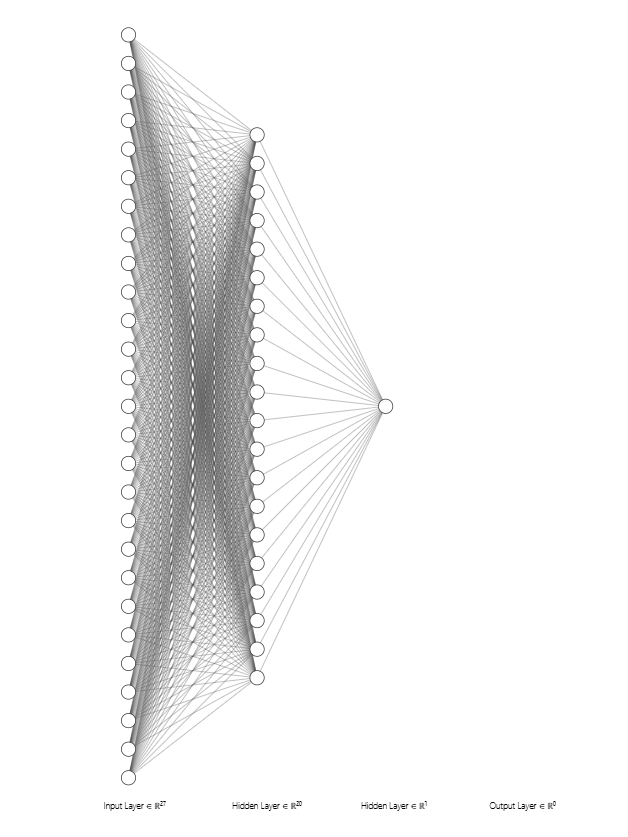

3. **Rede Neural Profunda (Deep Neural Network)**: Uma rede neural com mais camadas ocultas e um número maior de neurônios, capaz de aprender padrões mais complexos nos dados. É utilizada em problemas que exigem maior capacidade de aprendizado, como reconhecimento de imagens ou análise de grandes conjuntos de dados. No código fornecido, a Rede Neural Profunda tem:

- Uma camada com 128 neurônios usando ReLU.

- Uma camada com 64 neurônios usando ReLU.

- Uma camada com 32 neurônios usando ReLU.

- Uma camada de saída com 1 neurônio usando a função de ativação sigmoid.

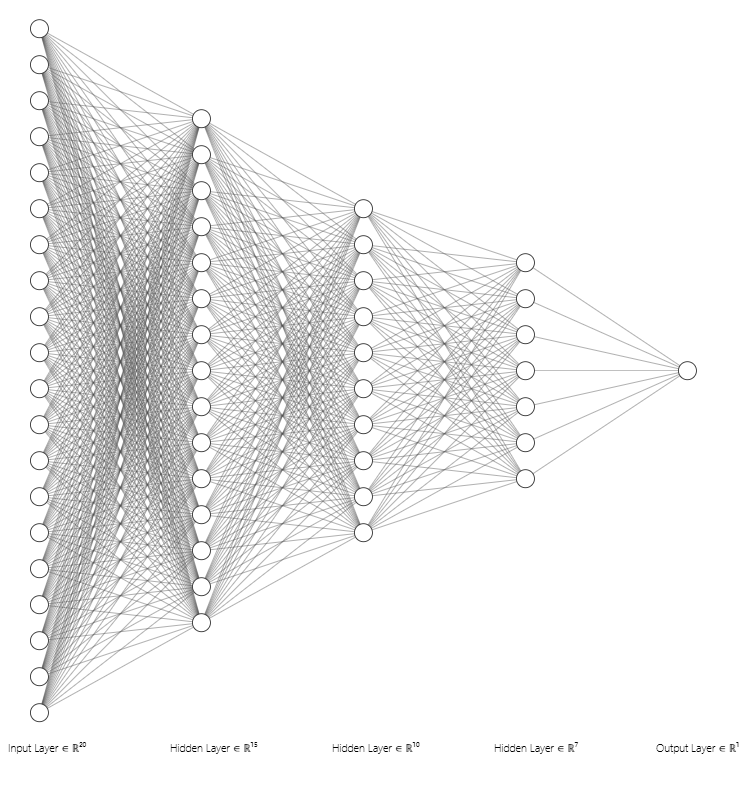

4. **Camada Densa (Dense Layer)**: Uma camada totalmente conectada em que cada neurônio está ligado a todos os neurônios da camada anterior. É responsável por aprender relações complexas nos dados.

5. **Função de Ativação ReLU**: ReLU (Rectified Linear Unit) é uma função de ativação que transforma a entrada em um valor positivo (se for maior que zero) ou em zero (se for menor ou igual a zero). É amplamente utilizada porque é eficiente para treinar redes neurais e ajuda a mitigar problemas de gradiente desvanecente.

6. **Função de Ativação Sigmoid**: Uma função de ativação que mapeia a entrada em um intervalo entre 0 e 1, convertendo os valores em probabilidades. É útil para a camada de saída em problemas de classificação binária.

7. **Sequential API (Keras)**: Uma forma de construir modelos de redes neurais em Keras, onde as camadas são adicionadas de forma sequencial, uma após a outra.



In [ ]:
%%time

# Iterar sobre os modelos e gerar o relatório de classificação
for model_info in models:
    model_name = model_info["name"]
    model = model_info["model"]

    # Compilar o modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Treinar o modelo
    print(f"Training {model_name}...")

    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

    print(f"Finished training {model_name}\n")

In [ ]:
# Iterar sobre os modelos e treiná-los
for model_info in models:
    model_name = model_info["name"]
    model = model_info["model"]

    # Compilar o modelo
    if model_info.get("multi_class"):
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    else:
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Pré-processar os dados, se necessário
    if model_info.get("reshape"):
        X_train_mod = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_test_mod = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    else:
        X_train_mod = X_train
        X_test_mod = X_test

    # Plotar o histórico de treinamento
    plt.figure(figsize=(12, 5))

    # Plotar a precisão
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy Over Epochs for {model_name}')
    plt.legend()

    # Plotar a perda
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Loss Over Epochs for {model_name}')
    plt.legend()

    plt.tight_layout()
    plt.show()

**Análise desempenho rede neural**

Esses gráficos apresentam o desempenho de duas redes neurais durante o treinamento e validação em termos de acurácia e perda (loss) ao longo de várias épocas.

### Análise dos Gráficos

1. **Gráficos de Acurácia**:
   - A acurácia de treinamento (linha azul) aumenta rapidamente nas primeiras épocas e depois se estabiliza.
   - A acurácia de validação (linha laranja) permanece constante e próxima à acurácia de treinamento, indicando que o modelo não está superajustando (overfitting) ou subajustando (underfitting) significativamente.

2. **Gráficos de Perda (Loss)**:
   - A perda de treinamento (linha azul) diminui acentuadamente nas primeiras épocas e depois estabiliza, sugerindo que o modelo aprende rapidamente no início.
   - A perda de validação (linha laranja) é estável e menor que a perda de treinamento, o que pode indicar que o modelo está generalizando bem para os dados de validação.

### Interpretação para o Time de Negócio
- Ambos os modelos (Rede Neural Simples e Profunda) mostraram um rápido aprendizado no início, o que é bom para otimização e eficiência.
- Como a acurácia de validação é semelhante à acurácia de treinamento, isso indica que os modelos têm um bom desempenho geral sem sinais evidentes de overfitting.
- Esses resultados sugerem que as redes neurais podem ser adequadas para prever com precisão os dados em produção, mas ainda pode ser necessário avaliar mais profundamente com métricas adicionais e ajustar parâmetros conforme necessário.

Essencialmente, a abordagem demonstra que as redes neurais podem rapidamente aprender padrões e manter uma boa precisão com pouca divergência entre o treinamento e a validação, o que é promissor para implementações práticas.

In [ ]:
# Lista para armazenar as métricas de acurácia
accuracy_list = []

# Iterar sobre os modelos, treinar cada um e calcular a acurácia
for model_info in models:
    model_name = model_info["name"]
    model = model_info["model"]

    # Compilar o modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Avaliar o modelo no conjunto de teste
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Adicionar a métrica de acurácia ao accuracy_list
    accuracy_list.append({
        "Model": model_name,
        "Accuracy": accuracy
    })

# Criar um DataFrame com as métricas de acurácia
accuracy_df = pd.DataFrame(accuracy_list)

# Mostrar o DataFrame
accuracy_df

**Análise métrica Accuracy**

Mostra os resultados de acurácia para dois modelos de redes neurais: a Rede Neural Simples e a Rede Neural Profunda. Ambos os modelos atingiram uma acurácia de 85,10% no conjunto de dados.

### Explicação para o Time de Negócio

- **Consistência nos Resultados**: Apesar das diferenças na complexidade dos modelos (um sendo mais simples e outro mais profundo), ambos alcançaram a mesma acurácia de 85,10%. Isso sugere que, para esse conjunto de dados específico, aumentar a complexidade da rede neural não trouxe benefícios significativos em termos de precisão.

- **Eficiência vs. Complexidade**: A Rede Neural Simples pode ser preferível para uso em produção devido à sua eficiência e menor custo computacional, já que oferece o mesmo desempenho que a versão mais complexa.

- **Próximos Passos**: É importante avaliar se outros fatores, como tempo de treinamento ou capacidade de generalização, influenciam a escolha do modelo mais adequado. Além disso, a acurácia de 85,10% é um bom ponto de partida, mas pode haver espaço para melhorias com ajustes de hiperparâmetros ou testes adicionais.

Em resumo, ambos os modelos são viáveis, e a decisão final deve considerar o equilíbrio entre desempenho e eficiência computacional.

In [ ]:
## Matriz de confusão Rede Neural

# Iterar sobre os modelos e treiná-los
for model_info in models:
    model_name = model_info["name"]
    model = model_info["model"]

    # Compilar o modelo
    if model_info.get("multi_class"):
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    else:
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Pré-processar os dados, se necessário
    if model_info.get("reshape"):
        X_train_mod = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_test_mod = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    else:
        X_train_mod = X_train
        X_test_mod = X_test

    # Fazer previsões no conjunto de teste
    y_pred = (model.predict(X_test_mod) > 0.5).astype("int32")

    # Calcular a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)

    # Plotar a matriz de confusão
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.xticks([0.5, 1.5], ["0: Não Atrasado", "1: Atrasado"])
    plt.yticks([0.5, 1.5], ["0: Não Atrasado", "1: Atrasado"], rotation=0)
    plt.tight_layout()
    plt.show()

    print("-" * 60)


**Análise matriz de confusão - Rede Neural**

Os gráficos que mostram as matrizes de confusão para as redes neurais Simples e Profunda revelam problemas significativos no desempenho dos modelos:

1. **Interpretação da Matriz de Confusão**:
   - Cada matriz possui duas classes: "Não Atrasado" (0) e "Atrasado" (1).
   - Os valores ao longo da diagonal principal (de cima à esquerda para baixo à direita) representam as previsões corretas.
   - Os valores fora da diagonal representam previsões incorretas.

2. **Desempenho dos Modelos**:
   - Ambos os modelos preveem todos os casos como "Não Atrasado". Isso é evidente porque o número de previsões corretas para "Não Atrasado" é alto (166,242), enquanto não há nenhuma previsão correta para "Atrasado".
   - Não houve uma única previsão de "Atrasado", indicando que os modelos não conseguem identificar a classe minoritária.

3. **Conclusão para o Time de Negócio**:
   - Apesar de as redes neurais parecerem ter uma boa precisão, elas falham em detectar voos atrasados. Isso indica um possível desequilíbrio nas classes de dados ou um problema na modelagem.
   - Para obter insights mais úteis, pode ser necessário equilibrar as classes ou ajustar a arquitetura da rede neural para melhorar a sensibilidade a atrasos.

Este resultado sugere que mudanças no pré-processamento dos dados ou ajustes no modelo são necessários para detectar voos atrasados de forma eficaz.

In [ ]:
## Classification report
from sklearn.metrics import classification_report

# Iterar sobre os modelos e gerar o relatório de classificação
for model_info in models:
    model_name = model_info["name"]
    model = model_info["model"]

    # Compilar o modelo
    if model_info.get("multi_class"):
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    else:
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Pré-processar os dados, se necessário
    if model_info.get("reshape"):
        X_train_mod = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_test_mod = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    else:
        X_train_mod = X_train
        X_test_mod = X_test

    # Fazer previsões no conjunto de teste
    if model_info.get("multi_class"):
        y_pred = np.argmax(model.predict(X_test_mod), axis=1)
        y_true = np.argmax(y_test, axis=1)
    else:
        y_pred = (model.predict(X_test_mod) > 0.5).astype("int32").flatten()
        y_true = y_test

    # Gerar o relatório de classificação
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_true, y_pred))
    print("-" * 60)

**Análise - Classification Report**

A análise dos **Classification Reports** para ambas as redes neurais (Simples e Profunda) indica problemas importantes no desempenho do modelo ao lidar com a classe "Atrasado". Vamos detalhar o significado de cada métrica:

### 1. **Precisão (Precision)**
   - **Classe 0 (Não Atrasado)**: A precisão é 0.85, o que significa que, quando o modelo prevê "Não Atrasado", está correto 85% das vezes.
   - **Classe 1 (Atrasado)**: A precisão é 0.00, o que significa que o modelo nunca acerta ao prever "Atrasado". Isso ocorre porque o modelo não prevê nenhum caso como "Atrasado".

### 2. **Revocação (Recall)**
   - **Classe 0 (Não Atrasado)**: A revocação é 1.00, o que significa que o modelo detecta todos os casos de "Não Atrasado" corretamente.
   - **Classe 1 (Atrasado)**: A revocação é 0.00, o que indica que o modelo não consegue identificar nenhum dos casos "Atrasado". Isso é problemático, especialmente se a detecção de atrasos for crucial.

### 3. **F1-Score**
   - **Classe 0 (Não Atrasado)**: O F1-Score é 0.92, indicando um bom equilíbrio entre precisão e revocação para a classe "Não Atrasado".
   - **Classe 1 (Atrasado)**: O F1-Score é 0.00, refletindo que o modelo é completamente ineficaz em identificar atrasos.

### 4. **Médias (Macro e Weighted Avg)**
   - **Macro Average**: As médias macro para precisão, revocação e F1-Score são baixas (em torno de 0.43 a 0.50), sugerindo que o modelo tem um desempenho desequilibrado entre as classes.
   - **Weighted Average**: As médias ponderadas são um pouco melhores (0.72 a 0.85), mas ainda refletem a ênfase excessiva do modelo na classe "Não Atrasado".

### 5. **Acurácia**
   - A acurácia geral do modelo é 0.85, o que parece alta, mas é enganosa. Isso ocorre porque o modelo simplesmente classifica quase todos os exemplos como "Não Atrasado", ignorando completamente a classe "Atrasado".

### **Conclusão**
- Ambas as redes neurais apresentam um desempenho altamente insatisfatório na detecção de voos atrasados. O modelo falha em identificar a classe "Atrasado", resultando em uma precisão, revocação e F1-Score de 0.00 para essa classe.
- O desequilíbrio de classes é um problema evidente, já que o modelo prioriza a classe "Não Atrasado" devido à sua predominância nos dados.
- **Recomendações**:
  - Implementar técnicas para lidar com o desequilíbrio de classes, como oversampling (aumentar os casos da classe minoritária) ou undersampling (reduzir os casos da classe majoritária).
  - Ajustar a função de perda para dar mais peso à classe "Atrasado".
  - Testar outras arquiteturas de redes neurais ou modelos de machine learning que possam lidar melhor com dados desbalanceados.

Essa análise destaca que, apesar de uma acurácia aparente de 85%, o modelo não é útil para prever atrasos, o que é um grande problema para aplicações práticas onde detectar atrasos é fundamental.

## **Melhores modelos**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Avaliar modelos de machine learning
ml_models = [('Naive Bayes', GaussianNB()),
             ('Decision Tree', DecisionTreeClassifier(random_state=42)),
             ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
             ('Logistic Regression', LogisticRegression(random_state=50, max_iter=1000)),
             ('AdaBoost', AdaBoostClassifier(random_state=45)),
             ('XGBoost', XGBClassifier(random_state=42)),
             ('LightGBM', LGBMClassifier(boosting_type='gbdt', bagging_fraction=0.9, learning_rate=0.05, feature_fraction=0.9, bagging_freq=50, verbosity=-1)),
             ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)),
             ('Gradient Boosting', GradientBoostingClassifier(random_state=42))]

# Lista de modelos de redes neurais
nn_models = [{"name": "Simple Neural Network",
              "model": keras.Sequential([keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
                                         keras.layers.Dense(32, activation='relu'),
                                         keras.layers.Dense(1, activation='sigmoid')])},

             {"name": "Deep Neural Network",
              "model": keras.Sequential([keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
                                         keras.layers.Dense(64, activation='relu'),
                                         keras.layers.Dense(32, activation='relu'),
                                         keras.layers.Dense(1, activation='sigmoid')])}]

# Lista para armazenar as métricas de todos os modelos
metrics_list = []

# Avaliar modelos de machine learning
for model_name, model in ml_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    metrics_list.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1})

# Avaliar redes neurais
for model_info in nn_models:
    model_name = model_info["name"]
    model = model_info["model"]
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0, validation_split=0.2)
    y_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    metrics_list.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1})

# Converter a lista de métricas em um DataFrame
metrics_df = pd.DataFrame(metrics_list)
best_model_idx = metrics_df['F1-Score'].idxmax()

# Função para destacar o melhor modelo
def highlight_best(s):
    return ['background-color: yellow' if s.name == best_model_idx else '' for _ in s]

# Aplicar o destaque ao DataFrame
styled_df = metrics_df.style.apply(highlight_best, axis=1)
styled_df

# **Conclusão modelos**


Com base nos resultados apresentados na tabela de métricas, podemos fazer as seguintes observações sobre o desempenho dos modelos de machine learning e redes neurais:

1. **Melhor Modelo - Random Forest**
   - O **Random Forest** obteve o melhor desempenho geral, com uma **F1-Score de 0.812303**, a maior entre todos os modelos.
   - Este modelo também apresentou uma alta precisão (0.809785) e recall (0.864892), o que indica que ele é eficaz em identificar corretamente as classes sem comprometer a capacidade de generalização.

2. **Desempenho Equilibrado**
   - A maioria dos modelos, como **Logistic Regression**, **Naive Bayes**, **LightGBM**, e as redes neurais, alcançaram uma **F1-Score de aproximadamente 0.804853**.
   - Esses modelos têm alta precisão e recall, sugerindo que são consistentes, mas não superam o Random Forest em termos de equilíbrio entre as duas métricas.

3. **Modelos com Menor Desempenho**
   - O **K-Nearest Neighbors (KNN)** teve o pior desempenho em termos de **F1-Score (0.810294)** e **Accuracy (0.849900)**, indicando que o modelo pode não ser adequado para este problema devido a uma possível sensibilidade a variações nos dados.
   - O **Decision Tree** também apresentou um desempenho inferior em comparação com modelos mais complexos como o Random Forest, destacando o risco de overfitting em árvores de decisão simples.

4. **Desempenho das Redes Neurais**
   - Tanto a **Simple Neural Network** quanto a **Deep Neural Network** tiveram uma **Accuracy de 0.866731** e uma **F1-Score de 0.804853**.
   - Esses resultados indicam que as redes neurais podem ser boas alternativas, especialmente se mais dados ou ajustes na arquitetura forem feitos, mas, nesta configuração, não superaram os métodos de ensemble como o Random Forest.

5. **Considerações sobre Modelos de Boosting**
   - Modelos como **XGBoost** e **AdaBoost** mostraram desempenho consistente com **F1-Scores próximas de 0.808**, sugerindo que técnicas de boosting são eficazes, mas requerem mais ajustes para melhorar ainda mais o desempenho
.

### Recomendações
- O **Random Forest** deve ser considerado o modelo principal, dado seu equilíbrio entre precisão e recall, tornando
-o uma escolha robusta.
- Para melhorar ainda mais o desempenho, considere otimizar hiperparâmetros usando técnicas de busca em g
rade ou busca aleatória.
- As redes neurais podem ser refinadas ou ajustadas (por exemplo, mais camadas ou neurônios) se houver um aumento nos dados ou uma necessidade específi
ca de modelagem complexa.
- Se o tempo de treinamento ou a interpretabilidade forem fatores importantes, modelos mais simples como **Logistic Regression** ou **Naive Bayes** aindelos, estou aqui para ajudar!

## **Teste 2**

**Compra de novas aeronaves - desafio**

O próximo desafio envolve conhecimentos básicos para formulação de problemas relacionados à otimização.  A área de Frotas da GOL está fazendo um estudo de viabilidade para compra de aviões a jato de
passageiros para viagens de curtas, médias e longas distâncias, denominados Ac, Am e Al, respectivamente.

Sabe-se que os custos unitários destas aeronaves, em milhões de euros, são 2.100, 4.000 e 5.200, respectivamente. O conselho da companhia aprovou um orçamento de, no máximo, 120.000 milhões de euros para realização desta compra. Admite-se que os lucros anuais com cada um dos tipos de avião Ac, Am e Al, sejam de 190, 220 e 310 milhões de euros, respectivamente.

A GOL atualmente apresenta um quadro de comandantes para pilotar, no máximo, 25 aviões novos. Realizando a compra apenas de aeronaves Ac, os serviços de manutenção seriam capazes de garantir a manutenção de 36 aeronaves novas. Entretanto, do ponto de vista de demanda de trabalho da manutenção, cada avião Am equivale a 4/3 de um avião Ac e cada avião Al a 5/3 de um avião Ac.

A diretoria de Planejamento de Malha recomenda que, para cada aeronave Ac comprada, se comprem também pelo menos uma aeronave Al ou uma aeronave Am.
 Por outro lado, para manter as condições de preços dos aviões, o fornecedor exige que, selecionando a compra de um avião Al, também deverão ser comprados pelo menos 7 aviões Ac ou Am.

 A partir destes dados, o Diretor de Frotas solicitou sua ajuda para tomar a decisão sobre a quantidade de aviões de cada tipo comprar, de modo a maximizar o lucro da GOL.

 Formule este problema com um modelo de programação linear.

 Nosso interesse aqui é que você apenas desenvolva as fórmulas da função objetivo e restrições do problema. Não é necessário resolvê-lo.

---

# Problema de Otimização com Programação Linear

Neste problema, queremos maximizar o lucro anual da compra de aeronaves, sujeito a restrições de orçamento, número máximo de aeronaves, capacidade de manutenção, planejamento de malha, e exigências do fornecedor---

## Formulação do Problema

### Variáveis de Decisão
- \( x \): número de aeronaves do tipo Ac (curtas distâncias).
- \( y \): número de aeronaves do tipo Am (médias distâncias).
- \( z \): número de aeronaves do tipo Al (longas distâncias).

### Função Objetivo
Maximizar o lucro anual:
$$
\text{Maximizar: } 190x + 220y + 310z
$$

---

## Restrições

1. **Restrição de orçamento:**
   $$
   2.100x + 4.000y + 5.200z \leq 120.000
   $$

2. **Restrição de número máximo de aeronaves:**
   $$
   x + y + z \leq 25
   $$

3. **Capacidade de manutenção:**
   $$
   x \leq 36
   $$

4. **Equivalência de demanda de trabalho de manutenção:**
   - Um avião Am equivale a \( \frac{4}{3} \) de um avião Ac:
     $$
     y \leq \frac{4}{3}x
     $$
   - Um avião Al equivale a \( \frac{5}{3} \) de um avião Ac:
     $$
     z \geq \frac{5}{3}x
     $$

5. **Restrição de planejamento de malha:**
   - Para cada aeronave Ac comprada, uma aeronave Al deve ser comprada:
     $$
     z \geq x
     $$

6. **Restrição de fornecedor:**
   - Para cada aeronave Al comprada, devem ser compradas pelo menos 7 aeronaves Ac ou Am:

     $$
     x + y \geq 7z
     $$

---

## Conclusão
- **Objetivo*
*: Maximizar o lucro, sujeito às restrições mencionadas acima.
- **Modelo de Programação Linear**: Este modelo pode ser resolvido usando solvers dajuda para a implementação em Python, fique à vontade para pedir!
ajuda para a implementação em Python, fique à vontade para pedir!


# Questão 3 - Malha aérea

O próximo desafio envolve conhecimentos básicos para formulação de problemas relacionados à otimização.
A malha de uma empresa aérea é composta por um conjunto de voos e um conjunto de aeronaves. A cada voo associamos um aeroporto de origem, um aeroporto de destino, um horário de decolagem planejado (data-hora) e um horário de pouso planejado (data-hora). Chama-se de ARCO um par de voos que podem ser
conectados do ponto de vista lógico tanto espacialmente, quanto temporalmente, i.e., o segundo voo deve ter como origem o destino do primeiro e sua decolagem deve ocorrer num horário posterior ao pouso do
primeiro. No problema da construção da malha, tem-se por objetivo alocar cada voo à apenas uma aeronave, respeitando-se a sequencia espacial e temporal dos voos encadeados em uma dada aeronave. Veja um
exemplo de malha com 3 aeronaves e 10 voos na figura abaixo:

![img](img/002.png)

O próximo desafio envolve conhecimentos básicos para formulação de problemas relacionados à otimização.
Questões:

1. Descreva um pseudo-algoritmo que tenha como entrada o conjunto de voos de uma malha e como saída retorne todos os ARCOS possíveis, considerando limites temporais mínimos e máximos para a conexão de um par de voos.

2. Qual a complexidade do seu algoritmo proposto no tamanho da entrada do problema (número de voos)? É possível torna-lo mais eficiente?

3. Dado o histórico de horários reais de chegada de cada voo (lembre-se que os voos podem atrasar e, portanto, os horários de saída e chegada reais são diferentes daqueles planejados), bem como outros atributos como número de passageiros, passageiros em conexão, tripulação, meteorologia e etc, como você criaria um modelo preditivo para estimar a distribuição de atraso intrínseco na chegada, i.e. aquele independente do atraso da etapa anterior, para um dado voo futuro?

4. Como você modelaria o problema de construção da malha como um problema de programação inteira nas variáveis de ARCO, de modo a minimizar o atraso total médio propagado nos trilhos com base no modelo preditivo de atrasos da questão anterior? Dica: Multi-commodity flow problem.

* Nosso interesse aqui é que você apenas desenvolva as fórmulas da função objetivo e restrições do
problema. Não é necessário resolvê-lo

**Resposta:** O objetivo deste problema é alocar voos a aeronaves, respeitando a sequência espacial e temporal dos voos encadeados em uma malha aérea, com o objetivo de minimizar atrasos e otimizar o uso das aeronaves.

1) Psudo código

```plaintext
Entrada: Conjunto de voos V (cada voo tem um aeroporto de origem, destino, horário de decolagem e pouso)
Saída: Conjunto de ARCOs possíveis

1. Inicializar um conjunto vazio de ARCOs, A
2. Para cada voo v1 em V:
   3. Para cada voo v2 em V:
      4. Se o destino de v1 é igual à origem de v2 E
         (o horário de decolagem de v2 - o horário de pouso de v1) está dentro do intervalo [mínimo, máximo] de tempo permitido:
         5. Adicionar o ARCO (v1, v2) ao conjunto A
6. Retornar o conjunto A
```

2) Complexidade do Algoritmo e Possível Otimização

- **Complexidade**: O algoritmo proposto tem complexidade \( O(n^2) \), onde \( n \) é o número de voos na entrada. Isso ocorre porque há um loop aninhado que percorre todos os pares de voos

  
- **Possível Otimização*

    - Utilizar estruturas de dados como árvores de busca ou intervalos para reduzir a complexidade da verificação de limites de tempo
    - Ordenar os voos por horário de pouso e usar técnicas de busca binária para encontrar rapidamente os voos dentro dos limites temporais.

3) Modelo Preditivo para Atrasos

Para modelar a probabilidade de atraso intrínseco de um voo, independente do atraso de etapas anteriores:

3.1 **Coleta de Dados**: Obter informações históricas sobre horários reais de chegada e saída, além de atributos como:
   
   - Número de passageiros
   - Passageiros em conexão
   - Condições meteorológicas
   - Informações sobre a tripulação

3.2 **Análise de Variáveis**: Analisar quais fatores afetam significativamente os atrasos.

3.3 **Modelo Estatístico/Machine Learning**:
   
   - Usar modelos de regressão ou classificação, como Random Forest ou XGBoost, para prever a probabilidade de atraso.
   - Considerar a distribuição de atraso usando modelos probabilísticos.

3.4 **Validação**: Validar o modelo com um conjunto de dados de teste para garantir a precisão.


## 4. Modelagem do Problema de Construção da Malha

Para modelar o problema de construção da malha como um problema de programação inteira:

### Variáveis
 de Decisão
Defina variáveis binárias \( x_{ij} \) que indicam se o ARCO entre o voo \( i \) e o voo \( j \) é s
elecionado:
\[
x_{ij} = \begin{cases}
1, & \text{se o ARCO entre } i \text{ e } j \text{ é selecionado} \\
0, & \text{caso contrário}
\end{cases}
\]

### Função Objetivo
Minimize o atraso total médio propagado nos trilhos:
\[
\text{Minimizar: } \sum_{(i, j)} \text{atraso}_{ij} \times x_{ij}
\]

# Restrições

1. **Cada voo deve ser alocado a apenas uma aeronave**:
   $$
   \sum_{j} x_{ij} \leq 1 \quad \forall i
   $$

2. **As conexões devem respeitar os limites de tempo mínimo e máximo**:
   $$
   \text{tempo\_decolagem}_j - \text{tempo\_pouso}_i \in [\text{mínimo}, \text{máximo}]
   $$

3. **O fluxo deve ser contínuo**:
   $$
   \sum_{j} x_{ij} = \sum_{k} x_{jk} \quad \forall j
   $$

O modelo de fluxo multi-commodity é usado para lidar com as diferentes aeronaves, onde cada commodity representa uma aeronave específica e seus voos associados.